## Lending Case Club Study

In [128]:
## Import libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


In [129]:
# Ignore the warnings
warnings.filterwarnings(action="ignore")

# Read data from loan.csv
loanDataframe = pd.read_csv("loan.csv")

# View all the columns
pd.set_option('display.max_columns',None)

# View few rows
loanDataframe.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [130]:
## Identifying dimension of dataframe
loanDataframe.shape

(39717, 111)

In [131]:
# Missing value check
loanDataframe.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [132]:
# Checking percentage of missing values
loanDataframe.isnull().mean()*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [133]:
# Drop all columns which are completely null
loanDataframe.dropna(axis=1, how="all", inplace=True)
loanDataframe


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A

In [134]:
# Checking number of unique values in columns
no_of_unique_values_in_columns = loanDataframe.nunique().sort_values()
no_of_unique_values_in_columns

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [135]:
# Identifying single valued columns
single_valued_columns = no_of_unique_values_in_columns[no_of_unique_values_in_columns.values==1]
single_valued_columns

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
pymnt_plan                    1
initial_list_status           1
dtype: int64

In [136]:
# Removing the single valued columns as they cannot contribute in our analysis
loanDataframe.drop(columns = list(single_valued_columns.index), inplace = True)

In [137]:
# Identifying dimension of dataframe
loanDataframe.shape

(39717, 48)

In [138]:
# Removing columns that are not relevant for analysis
# 'id','member_id' are unique values and will not contribute in analysis
# 'emp_title','url','addr_state','desc' are random variables and cannot be used for analysis
# 'zip_code' is masked hence cannot be used as input for analysis
#'out_prncp','out_prncp_inv', 'total_pymnt','total_pymnt_inv', "total_rec_prncp","total_rec_int","total_rec_late_fee" - These are customer behaviour variables and will not contribute in analysis
# "recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d - These are customer behaviour variables and will not contribute in analysis

loanDataframe.drop(columns = ['id','member_id','emp_title','url','title','zip_code','addr_state','desc','funded_amnt','out_prncp',
                        'out_prncp_inv', 'total_pymnt','total_pymnt_inv', "total_rec_prncp","total_rec_int","total_rec_late_fee",
                        "recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"],inplace = True)

In [139]:
# Identifying dimension of dataframe
loanDataframe.shape

(39717, 27)

In [140]:
# Columns in dataframe
loanDataframe.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'next_pymnt_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [141]:
# Different loan statuses
loanDataframe['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object

In [142]:
# Removing loans with status as current as it will not contribute in analysis 
loanDataframe = loanDataframe[loanDataframe['loan_status'] != 'Current']
loanDataframe.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [143]:
# Identifying dimension of dataframe
loanDataframe.shape

(38577, 27)

In [144]:
# Count of 'Fully Paid', 'Charged Off' loans
loanDataframe['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [145]:
# Identifying average percentage of missing values
loanDataframe.isnull().mean()*100

loan_amnt                   0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  2.677761
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.559193
mths_since_last_record     92.897322
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
revol_util                  0.129611
total_acc                   0.000000
next_pymnt_d              100.000000
pub_rec_bankruptcies        1.806776
d

In [146]:
# There are 3 columns namely 'next_pymnt_d','mths_since_last_record' and 'mths_since_last_delinq' 
# that have missing values more than 50%, so we can remove these columns
loanDataframe.drop(columns=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],inplace = True)
loanDataframe.shape

(38577, 24)

In [147]:
# Check the null values greater than 0
null_values = loanDataframe.isnull().sum()
null_values[null_values > 0]

emp_length              1033
revol_util                50
pub_rec_bankruptcies     697
dtype: int64

In [148]:
# There are 3 columns emp_length(2.67), revol_util(0.129) and pub_rec_bankruptcies(1.806) which have very less
#  % of missing values, hence we can remove the rows with missing values and it will not impact the analysis
loanDataframe.dropna(subset= ['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)

In [149]:
# Identifying again average percentage of missing values
loanDataframe.isnull().mean()*100

# We have cleaned the data as there are 0 average percentage of missing values

loan_amnt               0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
delinq_2yrs             0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [150]:
# Identifying dimension of dataframe
loanDataframe.shape

(36800, 24)

In [151]:
# Remove duplicate rows from dataframe
loanDataframe = loanDataframe.drop_duplicates()

# Dimension of dataframe
loanDataframe.shape

(36800, 24)

In [152]:
# Checking info of dataframe
loanDataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36800 entries, 0 to 39680
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36800 non-null  int64  
 1   funded_amnt_inv       36800 non-null  float64
 2   term                  36800 non-null  object 
 3   int_rate              36800 non-null  object 
 4   installment           36800 non-null  float64
 5   grade                 36800 non-null  object 
 6   sub_grade             36800 non-null  object 
 7   emp_length            36800 non-null  object 
 8   home_ownership        36800 non-null  object 
 9   annual_inc            36800 non-null  float64
 10  verification_status   36800 non-null  object 
 11  issue_d               36800 non-null  object 
 12  loan_status           36800 non-null  object 
 13  purpose               36800 non-null  object 
 14  dti                   36800 non-null  float64
 15  delinq_2yrs           36

In [153]:
# Correcting data type and format of columns and deriving new columns

# Removing ' months' from 'term' column and converting it to int  
loanDataframe.term = loanDataframe.term.apply(lambda x: int(x.replace(' months',''))).astype(int)

# Removing '%' from 'int_rate' column and converting it to float
loanDataframe.int_rate = loanDataframe.int_rate.apply(lambda x: float(x.replace('%',''))).astype(float).round(2)

# Converting categorical column 'grade' to categorical data type
loanDataframe.grade = loanDataframe.grade.astype('category')

# Converting categorical column 'sub_grade' to categorical data type
loanDataframe.sub_grade = loanDataframe.sub_grade.astype('category')

# Formatting categorical column 'emp_length' as per needs
loanDataframe.emp_length = loanDataframe.emp_length.apply(lambda x: int(x.replace('< 1','0').replace('10+','10').replace(' years','').replace(' year',''))).astype(int)

# Converting categorical column 'home_ownership' to categorical data type
loanDataframe.home_ownership=loanDataframe.home_ownership.astype('category')

# Converting categorical column 'verification_status' to categorical data type
loanDataframe.verification_status=loanDataframe.verification_status.astype('category')

# Formatting 'issue_d' column and deriving new columns
loanDataframe.issue_d = pd.to_datetime(loanDataframe.issue_d,format='%b-%y')
loanDataframe['issue_year'] = loanDataframe.issue_d.dt.year
loanDataframe['issue_month'] = loanDataframe.issue_d.dt.month

# Converting categorical column 'loan_status' to categorical data type
loanDataframe.loan_status=loanDataframe.loan_status.astype('category')

# Converting categorical column 'purpose' to categorical data type
loanDataframe.purpose=loanDataframe.purpose.astype('category')

# Removing '%' from 'revol_util' column and converting it to float
loanDataframe.revol_util = loanDataframe.revol_util.apply(lambda x: float(x.replace('%',''))).astype(float).round(2)

# Formatting 'earliest_cr_line' column and deriving new columns
loanDataframe.earliest_cr_line = pd.to_datetime(loanDataframe.earliest_cr_line, format='%b-%y')
loanDataframe['earliest_cr_line_year'] = loanDataframe.earliest_cr_line.dt.year

In [154]:
# We have standardized the values, checking info of dataframe
loanDataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36800 entries, 0 to 39680
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   loan_amnt              36800 non-null  int64         
 1   funded_amnt_inv        36800 non-null  float64       
 2   term                   36800 non-null  int32         
 3   int_rate               36800 non-null  float64       
 4   installment            36800 non-null  float64       
 5   grade                  36800 non-null  category      
 6   sub_grade              36800 non-null  category      
 7   emp_length             36800 non-null  int32         
 8   home_ownership         36800 non-null  category      
 9   annual_inc             36800 non-null  float64       
 10  verification_status    36800 non-null  category      
 11  issue_d                36800 non-null  datetime64[ns]
 12  loan_status            36800 non-null  category      
 13  purpos

In [155]:
# Identifying Categorical and Continuous columns
categorical_columns = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose']
continuous_columns = ['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'issue_year', 'issue_month', 'earliest_cr_line_year']


##### Handling the outliers for Continuous variables

<Axes: >

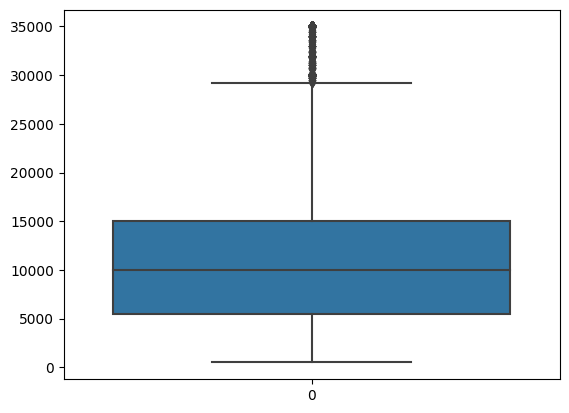

In [156]:
# Handling outliers for 'loan_amnt'
sns.boxplot(loanDataframe.loan_amnt)

In [157]:
# Find the Quantiles
loanDataframe.loan_amnt.quantile([0.75,0.90, 0.95, 0.97,0.98,0.982, 0.99, 1])

# The distribution seems to be continuous, hence there is no need to remove the outliers

0.750    15000.0
0.900    22000.0
0.950    25000.0
0.970    28800.0
0.980    30000.0
0.982    32000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

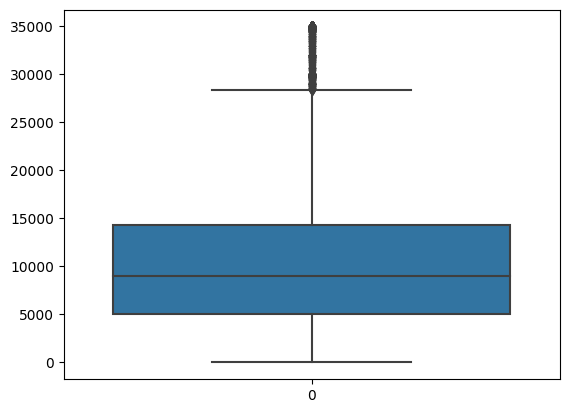

In [158]:
# Handling outliers for 'funded_amnt_inv'
sns.boxplot(loanDataframe.funded_amnt_inv)

In [159]:
# Find the Quantiles
loanDataframe.funded_amnt_inv.quantile([0.75,0.90, 0.95, 0.97,0.98,0.985, 0.99, 1])

# The distribution seems to be continuous, hence there is no need to remove the outliers

0.750    14350.000000
0.900    20000.000000
0.950    24655.816803
0.970    26100.750000
0.980    29950.000000
0.985    30675.000000
0.990    34725.000000
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

<Axes: >

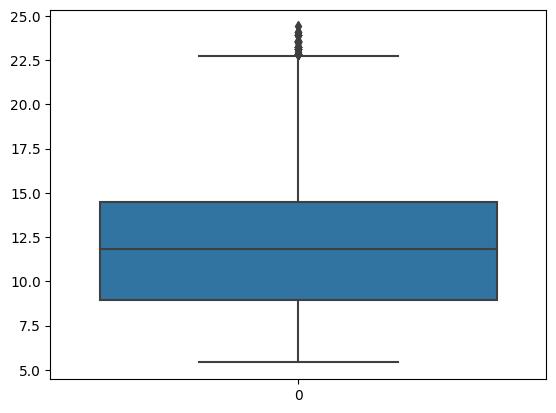

In [160]:
# Handling outliers for 'int_rate'
sns.boxplot(loanDataframe.int_rate)

In [161]:
# Find the Quantiles
loanDataframe.int_rate.quantile([0.75,0.90, 0.95, 0.97,0.98,0.99, 0.997,1])

# The distribution seems to be continuous, hence there is no need to remove the outliers

0.750    14.46
0.900    16.82
0.950    18.39
0.970    19.36
0.980    20.11
0.990    20.99
0.997    22.11
1.000    24.40
Name: int_rate, dtype: float64

<Axes: >

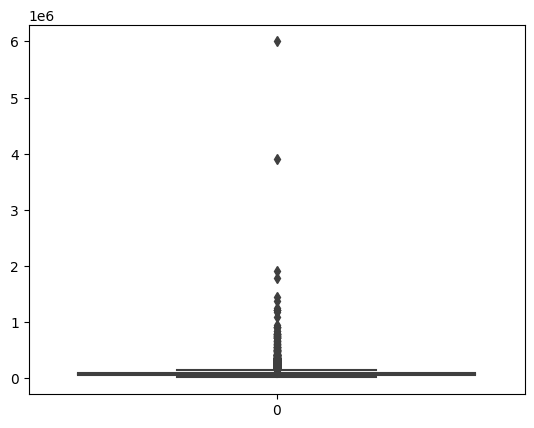

In [162]:
# Handling outliers for 'int_rate'
sns.boxplot(loanDataframe.annual_inc)

In [163]:
# Find the Quantiles
loanDataframe.annual_inc.quantile([0.5,0.75,0.90,0.95, 0.97,0.98,0.99,1])

# The value after 95 percentile seems disconnected so these can be removed

0.50      60000.00
0.75      83000.00
0.90     116738.90
0.95     142000.00
0.97     165996.12
0.98     188023.92
0.99     235000.00
1.00    6000000.00
Name: annual_inc, dtype: float64

In [164]:
# Removing outliers after 95 percentile
loanDataframe = loanDataframe[loanDataframe.annual_inc <= loanDataframe.annual_inc.quantile(0.95)]
loanDataframe.annual_inc.quantile([0.5,0.75,0.90,0.95, 0.97,0.98,0.99,1])

0.50     57000.0
0.75     78000.0
0.90    100079.9
0.95    119000.0
0.97    125000.0
0.98    130000.0
0.99    135000.0
1.00    142000.0
Name: annual_inc, dtype: float64

<Axes: >

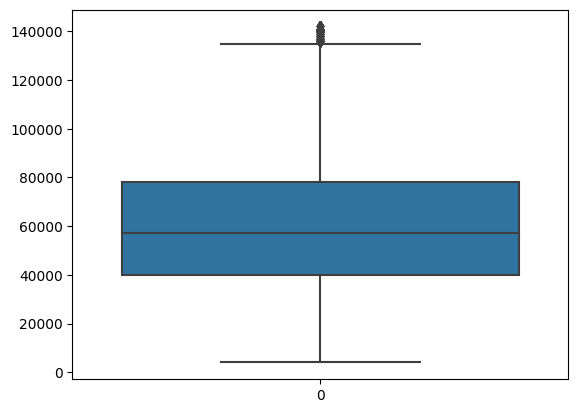

In [165]:
# Plotting the Box plot for 'int_rate' again and now distribution looks ok
sns.boxplot(loanDataframe.annual_inc)

<Axes: >

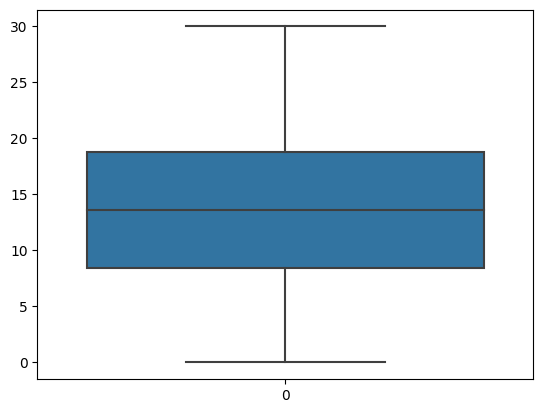

In [166]:
# Handling outliers for 'int_rate'
sns.boxplot(loanDataframe.dti)

# The distribution seems to be continuous and there are no outliers

### Univariate Analysis

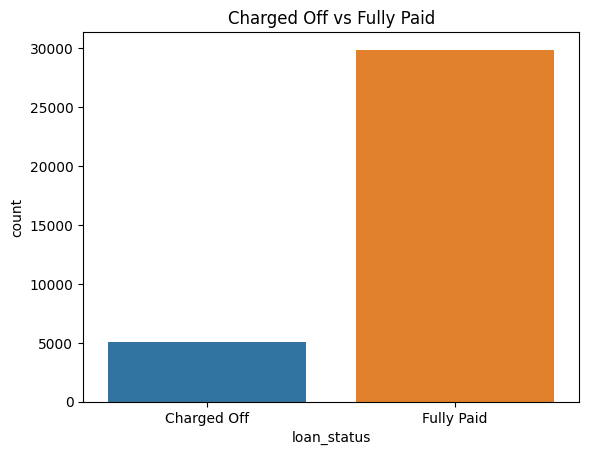

In [167]:
# Plot for Charged Off vs Fully Paid
sns.countplot(x = 'loan_status', data = loanDataframe).set_title('Charged Off vs Fully Paid')
plt.show()

##### Charged Off (Defaulted) loans are less compared to Fully Paid loans

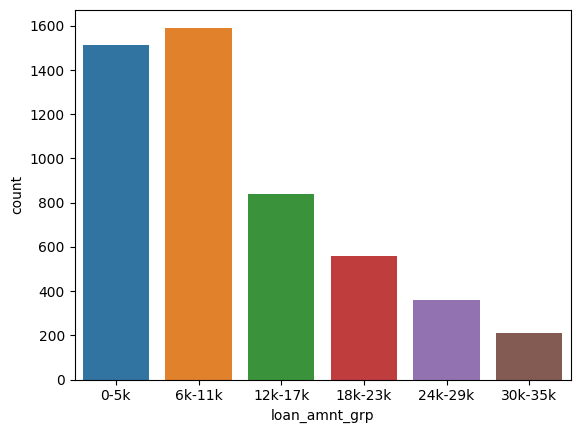

In [168]:
# Deriving new column for 'loan_amnt'
loanDataframe['loan_amnt_grp'] = pd.cut(loanDataframe['loan_amnt'], bins=6,labels=['0-5k','6k-11k','12k-17k','18k-23k','24k-29k','30k-35k'])

# Plot for 'loan_amnt'
sns.countplot(x = 'loan_amnt_grp', data = loanDataframe[loanDataframe['loan_status']=='Charged Off'])
plt.show()

##### When the loan amount is between 6k to 11k then the loan is most likely to default.

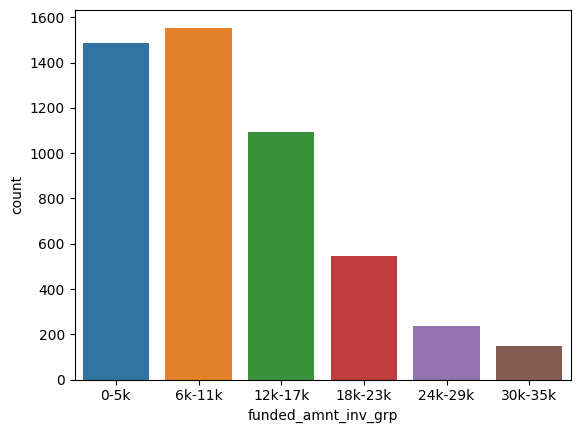

In [169]:
# Deriving new column for 'funded_amnt_inv'
loanDataframe['funded_amnt_inv_grp'] = pd.cut(loanDataframe['funded_amnt_inv'], bins=6,labels=['0-5k','6k-11k','12k-17k','18k-23k','24k-29k','30k-35k'])

# Plot for 'funded_amnt_inv'
sns.countplot(x = 'funded_amnt_inv_grp', data = loanDataframe[loanDataframe['loan_status']=='Charged Off'])
plt.show()

##### When the funding amount by investor is between 6k to 11k then the loan is most likely to default.

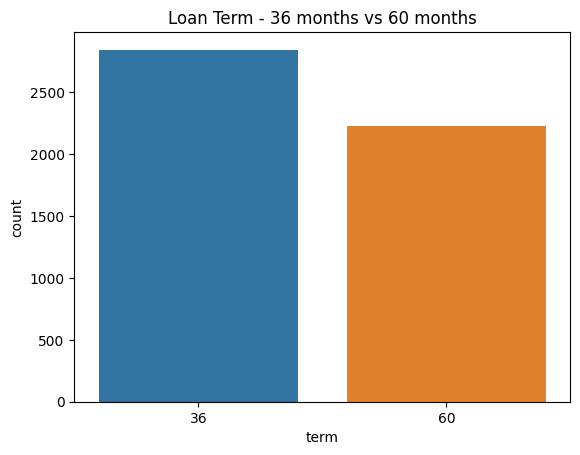

In [170]:
# Plot for Loan Term (36 months vs 60 months)
sns.countplot(x = 'term', data = loanDataframe[loanDataframe['loan_status']=='Charged Off']).set_title('Loan Term - 36 months vs 60 months')
plt.show()

##### The loans with 36 months term are more likely to default compared to 60 months term

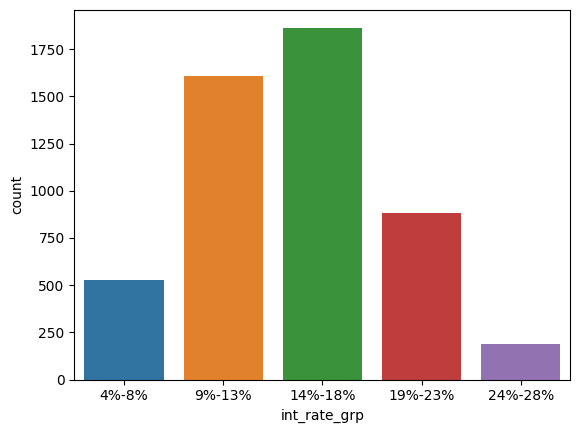

In [171]:
# Deriving new column for 'int_rate'
loanDataframe['int_rate_grp'] = pd.cut(loanDataframe['int_rate'], bins=5,labels=['4%-8%','9%-13%','14%-18%','19%-23%','24%-28%'])

# Plot for 'int_rate'
sns.countplot(x = 'int_rate_grp', data = loanDataframe[loanDataframe['loan_status']=='Charged Off'])
plt.show()

##### When the interest rate is between 14% to 18% then the loan is most likely to default.

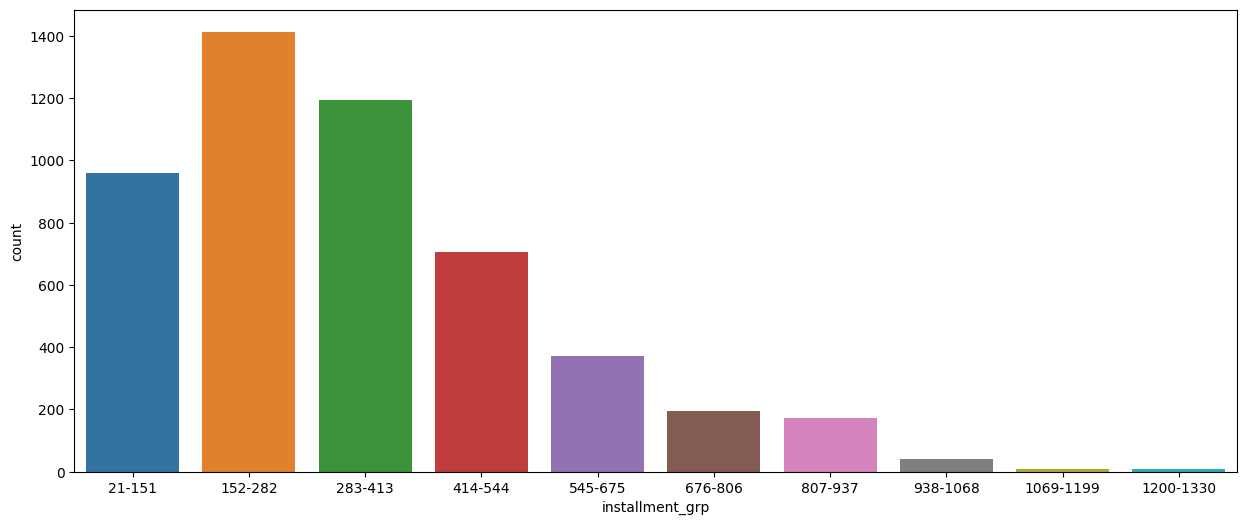

In [172]:
# Deriving new column for 'installment'
loanDataframe['installment_grp'] = pd.cut(loanDataframe['installment'], bins=10,labels=['21-151','152-282','283-413','414-544','545-675','676-806','807-937','938-1068','1069-1199','1200-1330'])

# Plot for 'int_rate'
plt.subplots(figsize = (15,6))
sns.countplot(x = 'installment_grp', data = loanDataframe[loanDataframe['loan_status']=='Charged Off'])
plt.show()

##### When the installment is between 152 to 282 then the loan is most likely to default.

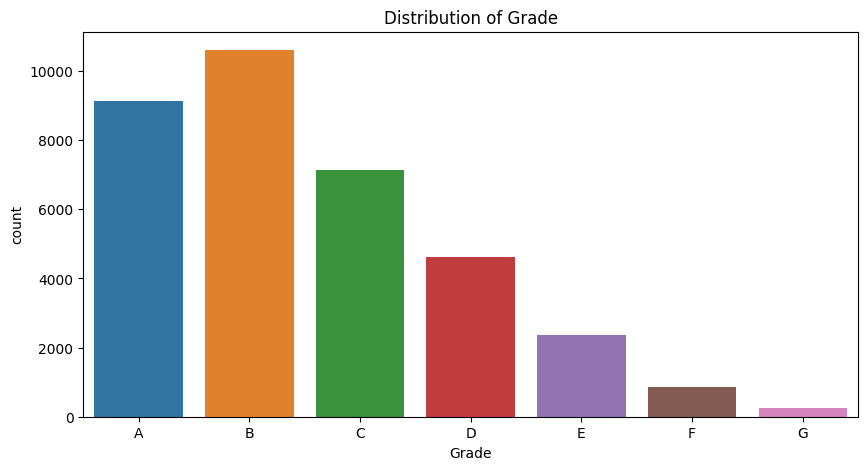

In [173]:
# Distribution of Grade
plt.figure(figsize=(10,5))
sns.countplot(loanDataframe[loanDataframe['loan_status']=='Charged Off'],x=loanDataframe.grade)
plt.xlabel('Grade')
plt.title('Distribution of Grade')
plt.show()

##### When the Sub Grade is A4 then the loan is most likely to default.

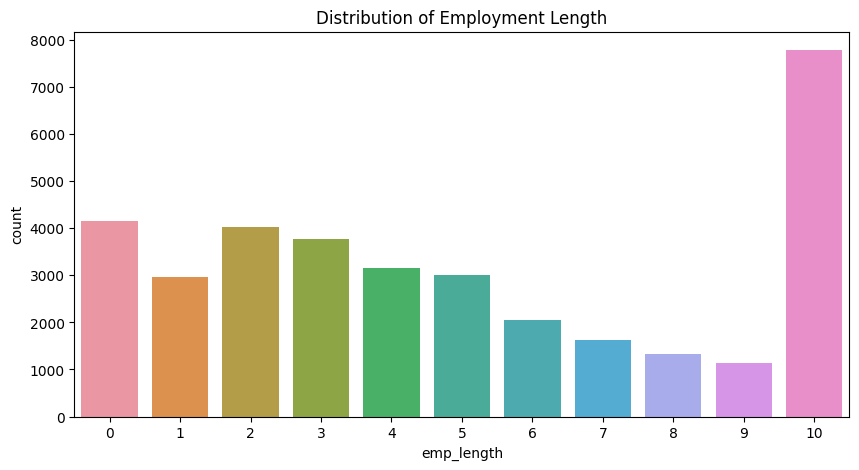

In [174]:
# Distribution of Employment Length
plt.figure(figsize=(10,5))
sns.countplot(loanDataframe[loanDataframe['loan_status']=='Charged Off'],x=loanDataframe.emp_length)
plt.xlabel('emp_length')
plt.title('Distribution of Employment Length')
plt.show()

##### When the Employment length is 10 years then the loan is most likely to default.

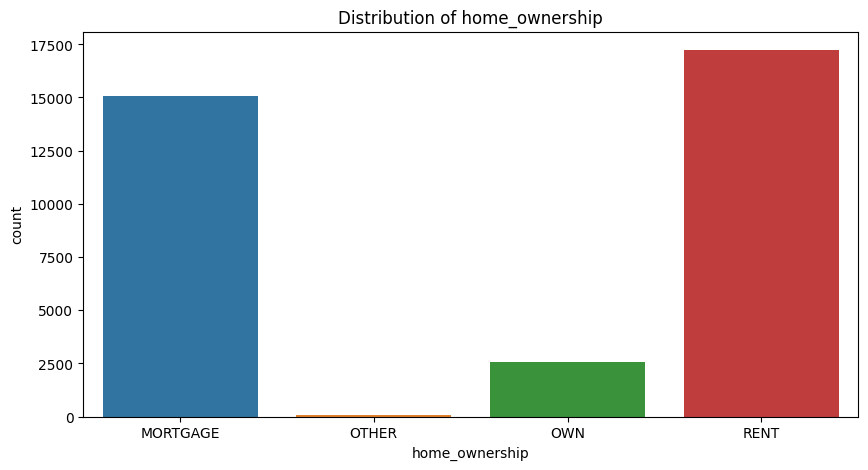

In [175]:
# Distribution of home_ownership
plt.figure(figsize=(10,5))
sns.countplot(loanDataframe[loanDataframe['loan_status']=='Charged Off'],x=loanDataframe.home_ownership)
plt.xlabel('home_ownership')
plt.title('Distribution of home_ownership')
plt.show()

##### When the home ownership is rented then the loan is most likely to default.

<Axes: xlabel='annual_inc_grp', ylabel='count'>

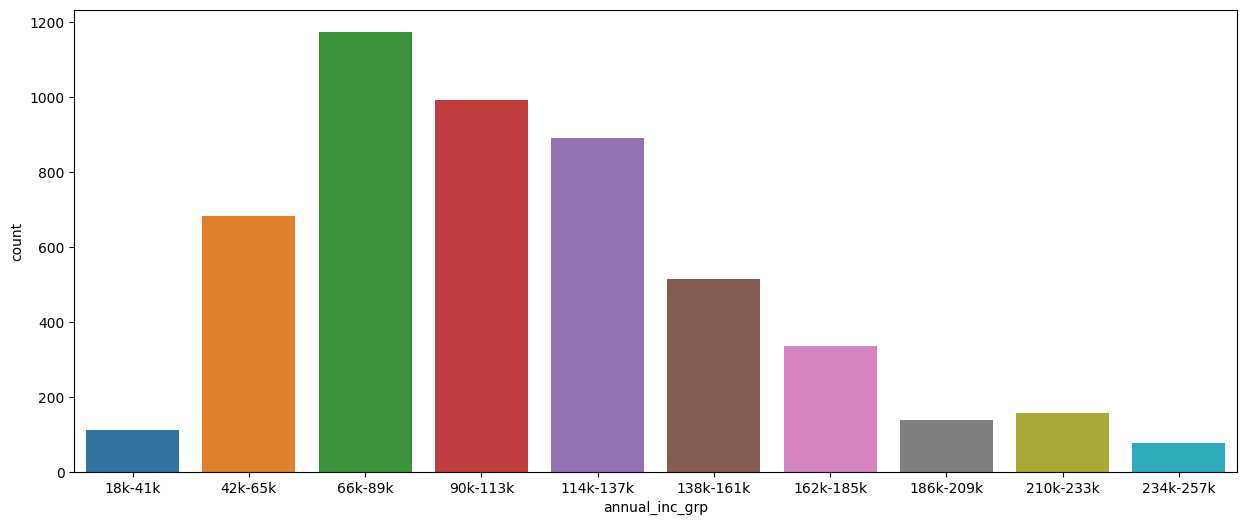

In [176]:
# Deriving new column for 'annual_inc'
loanDataframe['annual_inc_grp'] = pd.cut(loanDataframe['annual_inc'], bins=10,labels=['18k-41k','42k-65k','66k-89k','90k-113k','114k-137k','138k-161k','162k-185k','186k-209k','210k-233k','234k-257k'])

# Plot for 'annual_inc'
plt.subplots(figsize = (15,6))
sns.countplot(x = 'annual_inc_grp', data = loanDataframe[loanDataframe['loan_status']=='Charged Off'])

##### When the annual income is between 66k to 89k then the loan is most likely to default.

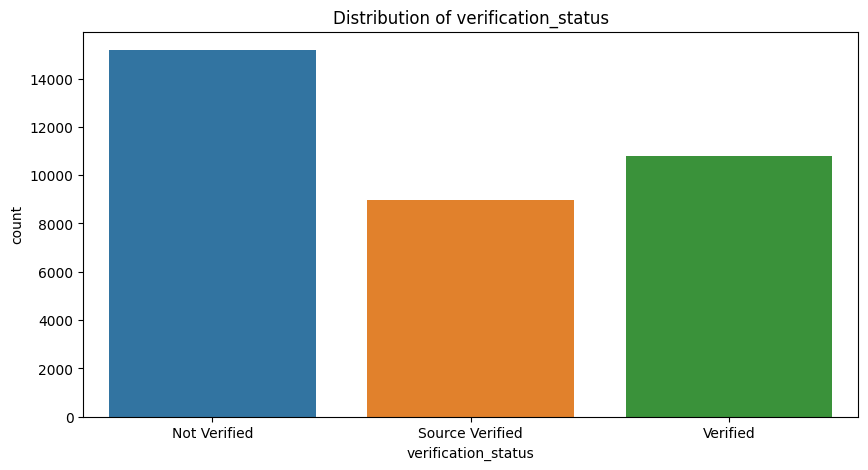

In [177]:
# Distribution of verification_status
plt.figure(figsize=(10,5))
sns.countplot(loanDataframe[loanDataframe['loan_status']=='Charged Off'],x=loanDataframe.verification_status)
plt.xlabel('verification_status')
plt.title('Distribution of verification_status')
plt.show()

##### If the income is not verified by LC then the loan is most likely to default.

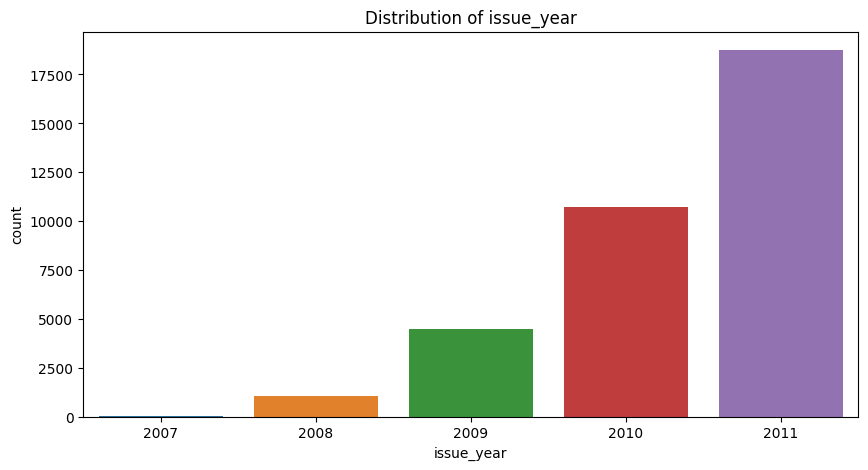

In [178]:
# Distribution of issue_year
plt.figure(figsize=(10,5))
sns.countplot(loanDataframe[loanDataframe['loan_status']=='Charged Off'],x=loanDataframe.issue_year)
plt.xlabel('issue_year')
plt.title('Distribution of issue_year')
plt.show()

##### Large number loans defaulted in 2011

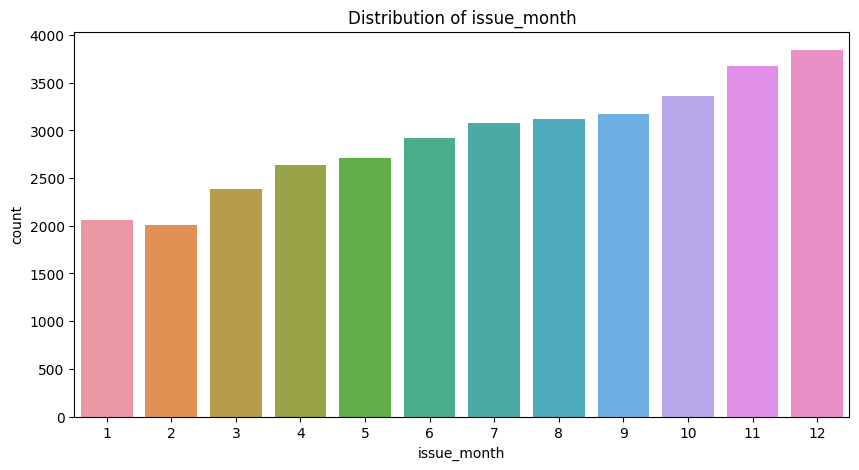

In [179]:
# Distribution of issue_month
plt.figure(figsize=(10,5))
sns.countplot(loanDataframe[loanDataframe['loan_status']=='Charged Off'],x=loanDataframe.issue_month)
plt.xlabel('issue_month')
plt.title('Distribution of issue_month')
plt.show()

##### Large number of loans defaulted in dec month

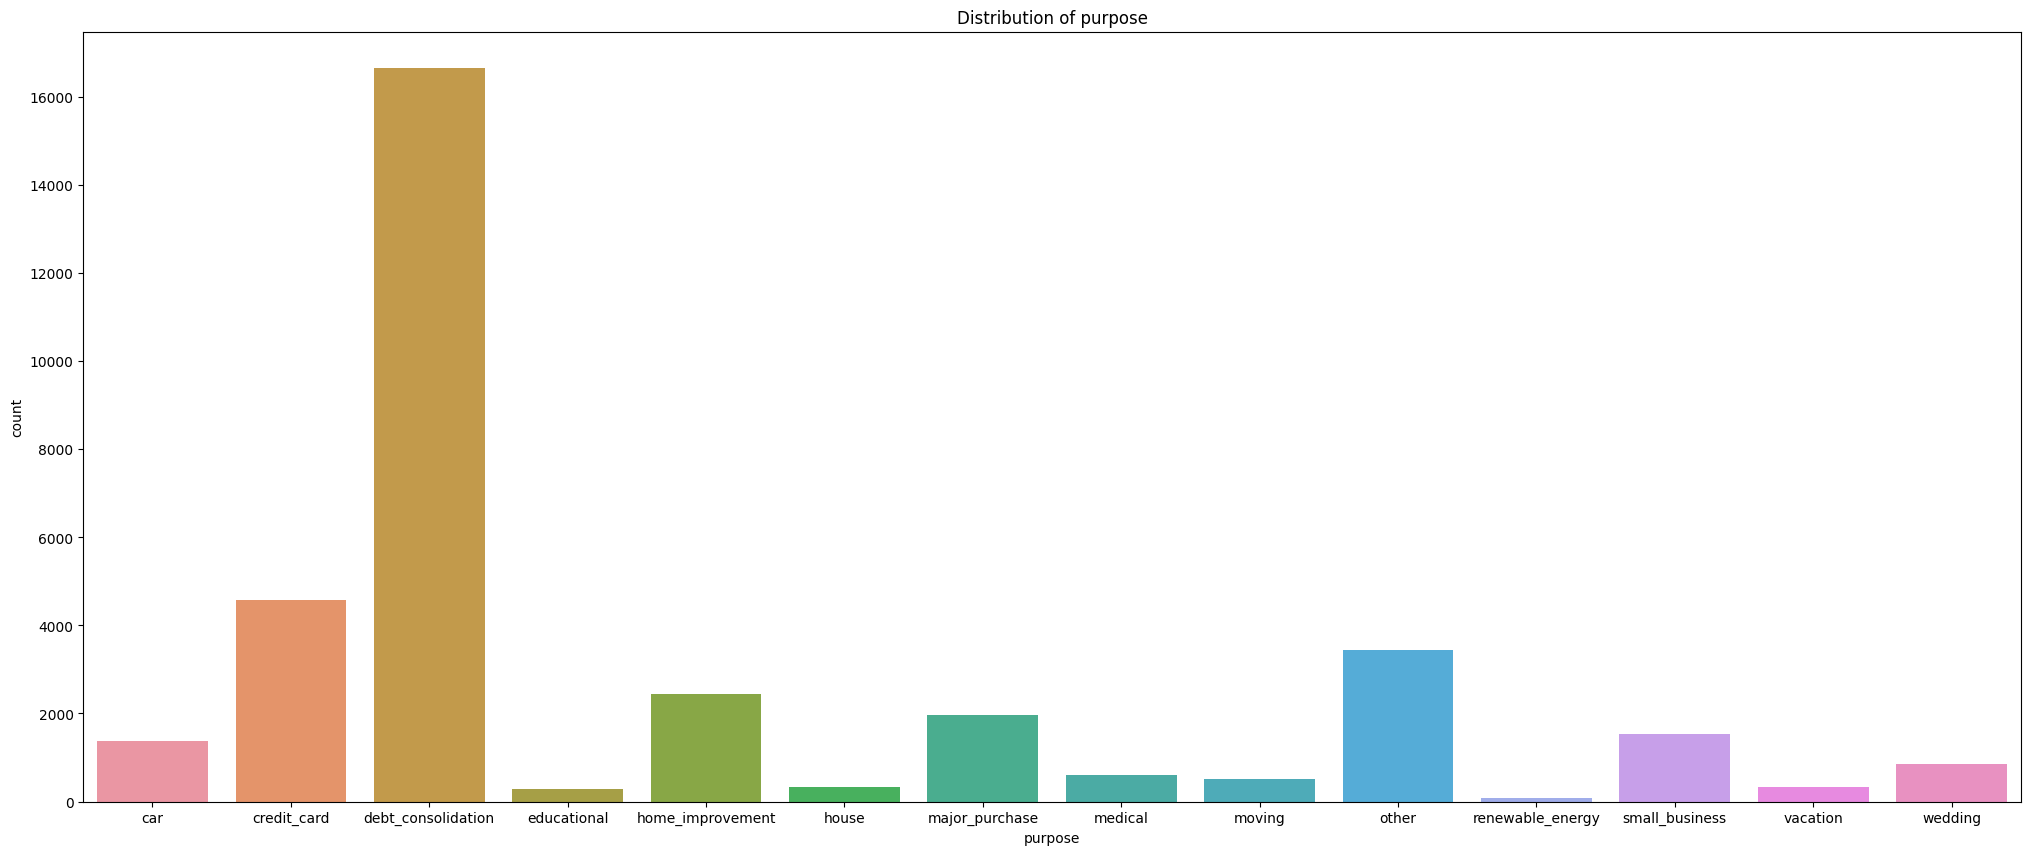

In [180]:
# Distribution of purpose
plt.figure(figsize=(25,10))
sns.countplot(loanDataframe[loanDataframe['loan_status']=='Charged Off'],x=loanDataframe.purpose)
plt.xlabel('purpose')
plt.title('Distribution of purpose')
plt.show()

##### When the loan purpose is debt_consolidation then the loan is most likely to default.

<Axes: xlabel='dti_grp', ylabel='count'>

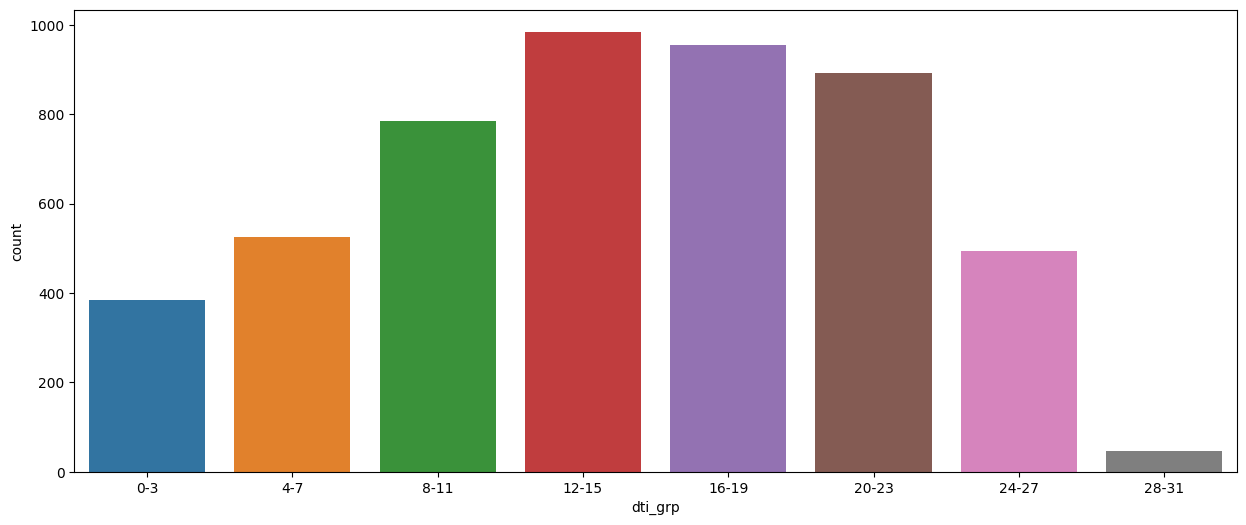

In [181]:
# Deriving new column for 'dti'
loanDataframe['dti_grp'] = pd.cut(loanDataframe['dti'], bins=8,labels=['0-3','4-7','8-11','12-15','16-19','20-23','24-27','28-31'])

# Plot for 'annual_inc'
plt.subplots(figsize = (15,6))
sns.countplot(x = 'dti_grp', data = loanDataframe[loanDataframe['loan_status']=='Charged Off'])

##### When dti is between 12-15 the loan is most likely to default

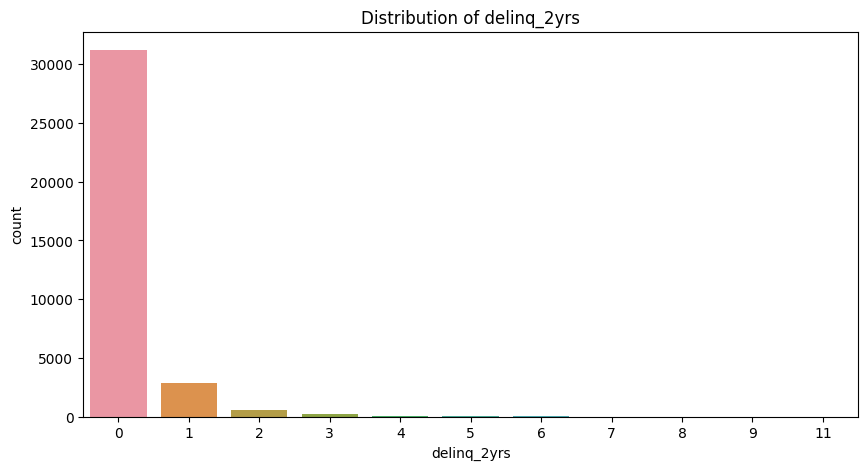

In [182]:
# Distribution of delinq_2yrs
plt.figure(figsize=(10,5))
sns.countplot(loanDataframe[loanDataframe['loan_status']=='Charged Off'],x=loanDataframe.delinq_2yrs)
plt.xlabel('delinq_2yrs')
plt.title('Distribution of delinq_2yrs')
plt.show()

##### For the defaulted loans delinq_2yrs is mostly 0

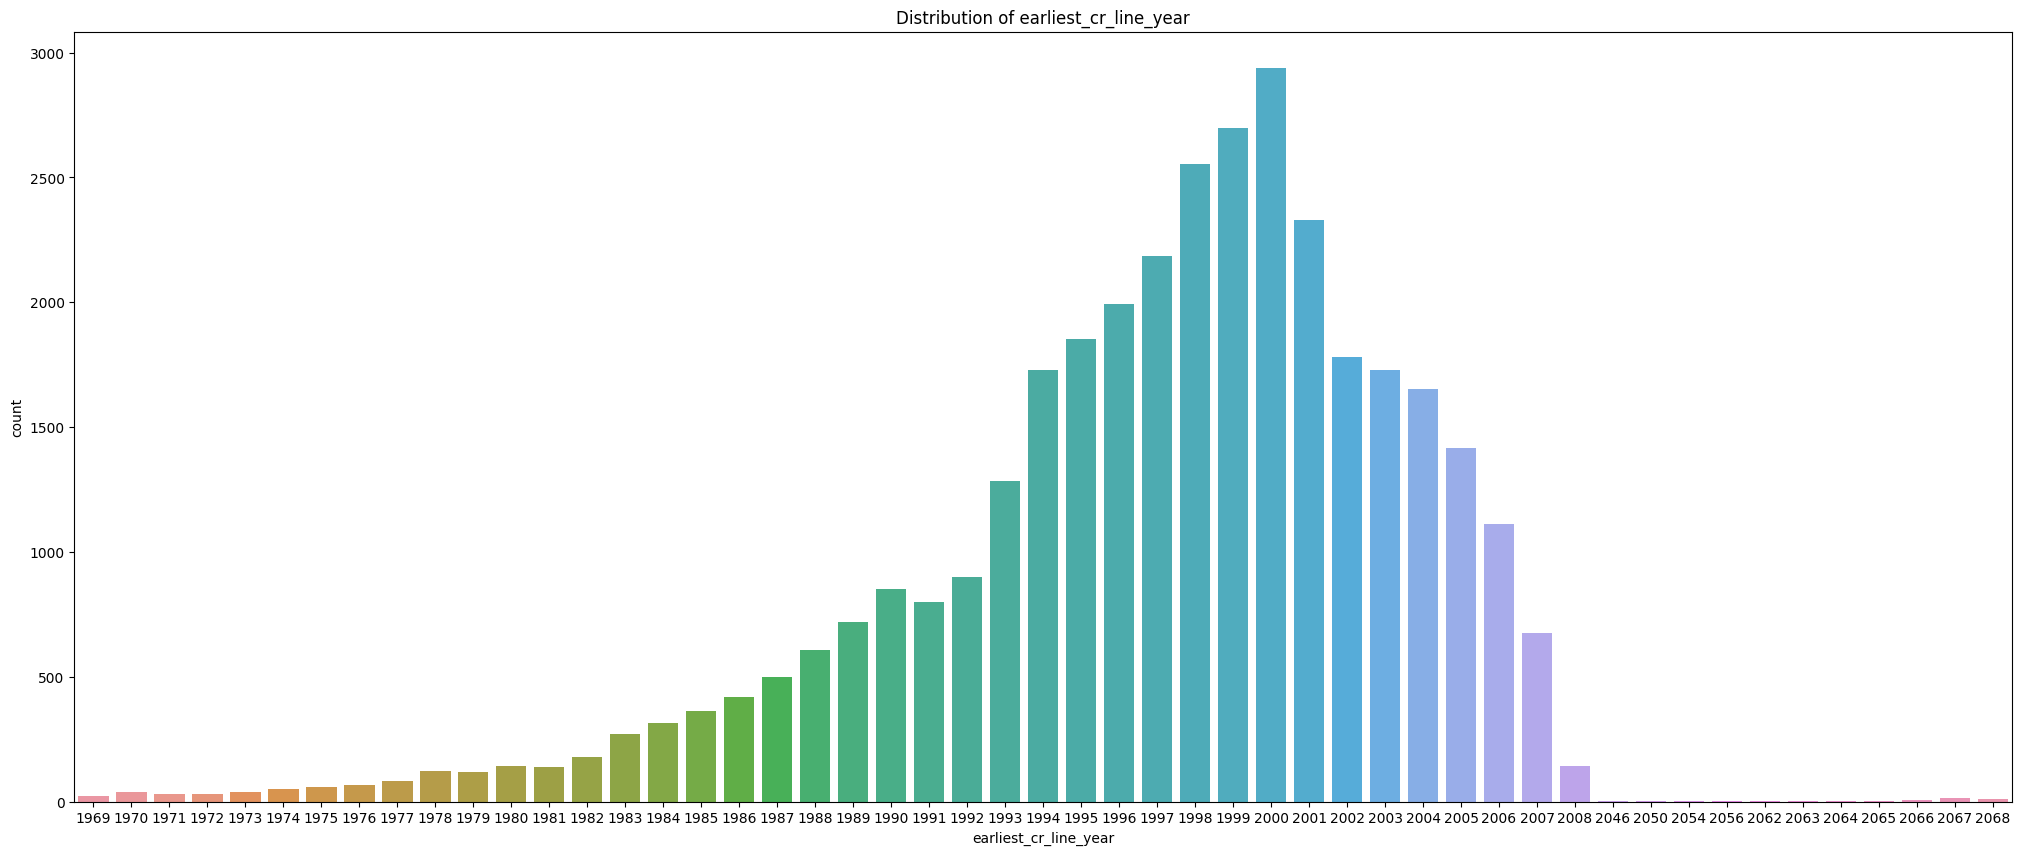

In [183]:
# Distribution of earliest_cr_line_year
plt.figure(figsize=(25,10))
sns.countplot(loanDataframe[loanDataframe['loan_status']=='Charged Off'],x=loanDataframe.earliest_cr_line_year)
plt.xlabel('earliest_cr_line_year')
plt.title('Distribution of earliest_cr_line_year')
plt.show()

##### If earliest_cr_line_year is between 1994 to 2004 then the loan is most likely to default

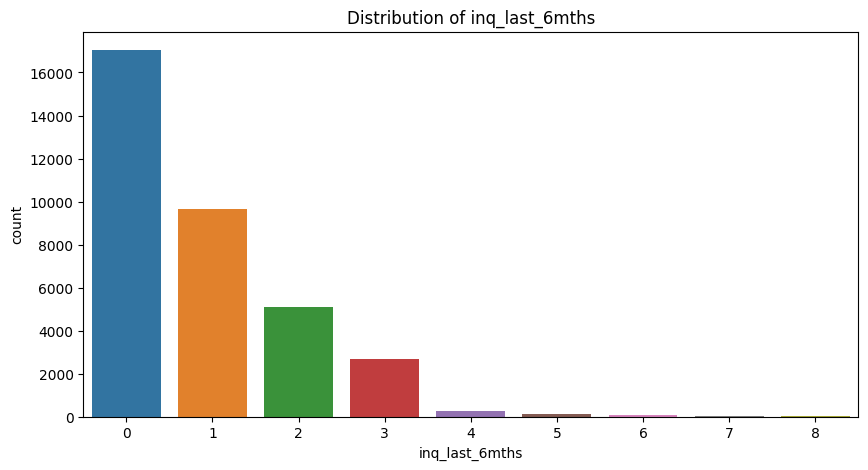

In [184]:
# Distribution of inq_last_6mths
plt.figure(figsize=(10,5))
sns.countplot(loanDataframe[loanDataframe['loan_status']=='Charged Off'],x=loanDataframe.inq_last_6mths)
plt.xlabel('inq_last_6mths')
plt.title('Distribution of inq_last_6mths')
plt.show()

##### If inq_last_6mths is 0 then the loan is most likely to default

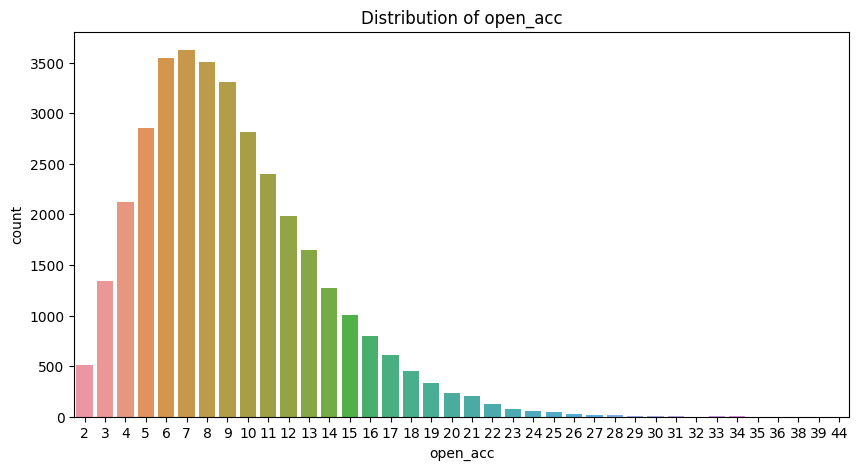

In [185]:
# Distribution of open_acc
plt.figure(figsize=(10,5))
sns.countplot(loanDataframe[loanDataframe['loan_status']=='Charged Off'],x=loanDataframe.open_acc)
plt.xlabel('open_acc')
plt.title('Distribution of open_acc')
plt.show()

##### If the open_acc is between 5-10 then the loan is most likely to default

<Axes: xlabel='revol_util_grp', ylabel='count'>

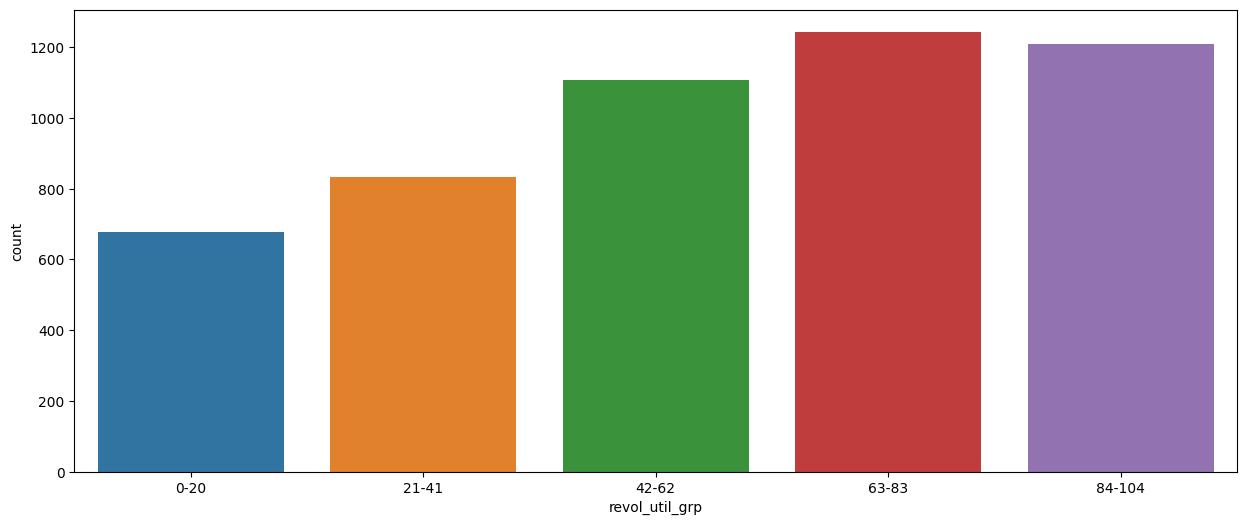

In [186]:
# Deriving new column for 'revol_util'
loanDataframe['revol_util_grp'] = pd.cut(loanDataframe['revol_util'], bins=5,labels=['0-20','21-41','42-62','63-83','84-104'])

# Plot for 'annual_inc'
plt.subplots(figsize = (15,6))
sns.countplot(x = 'revol_util_grp', data = loanDataframe[loanDataframe['loan_status']=='Charged Off'])

##### If revol_util range is between 63-83, then the loan is most likely to default, but it is not significant

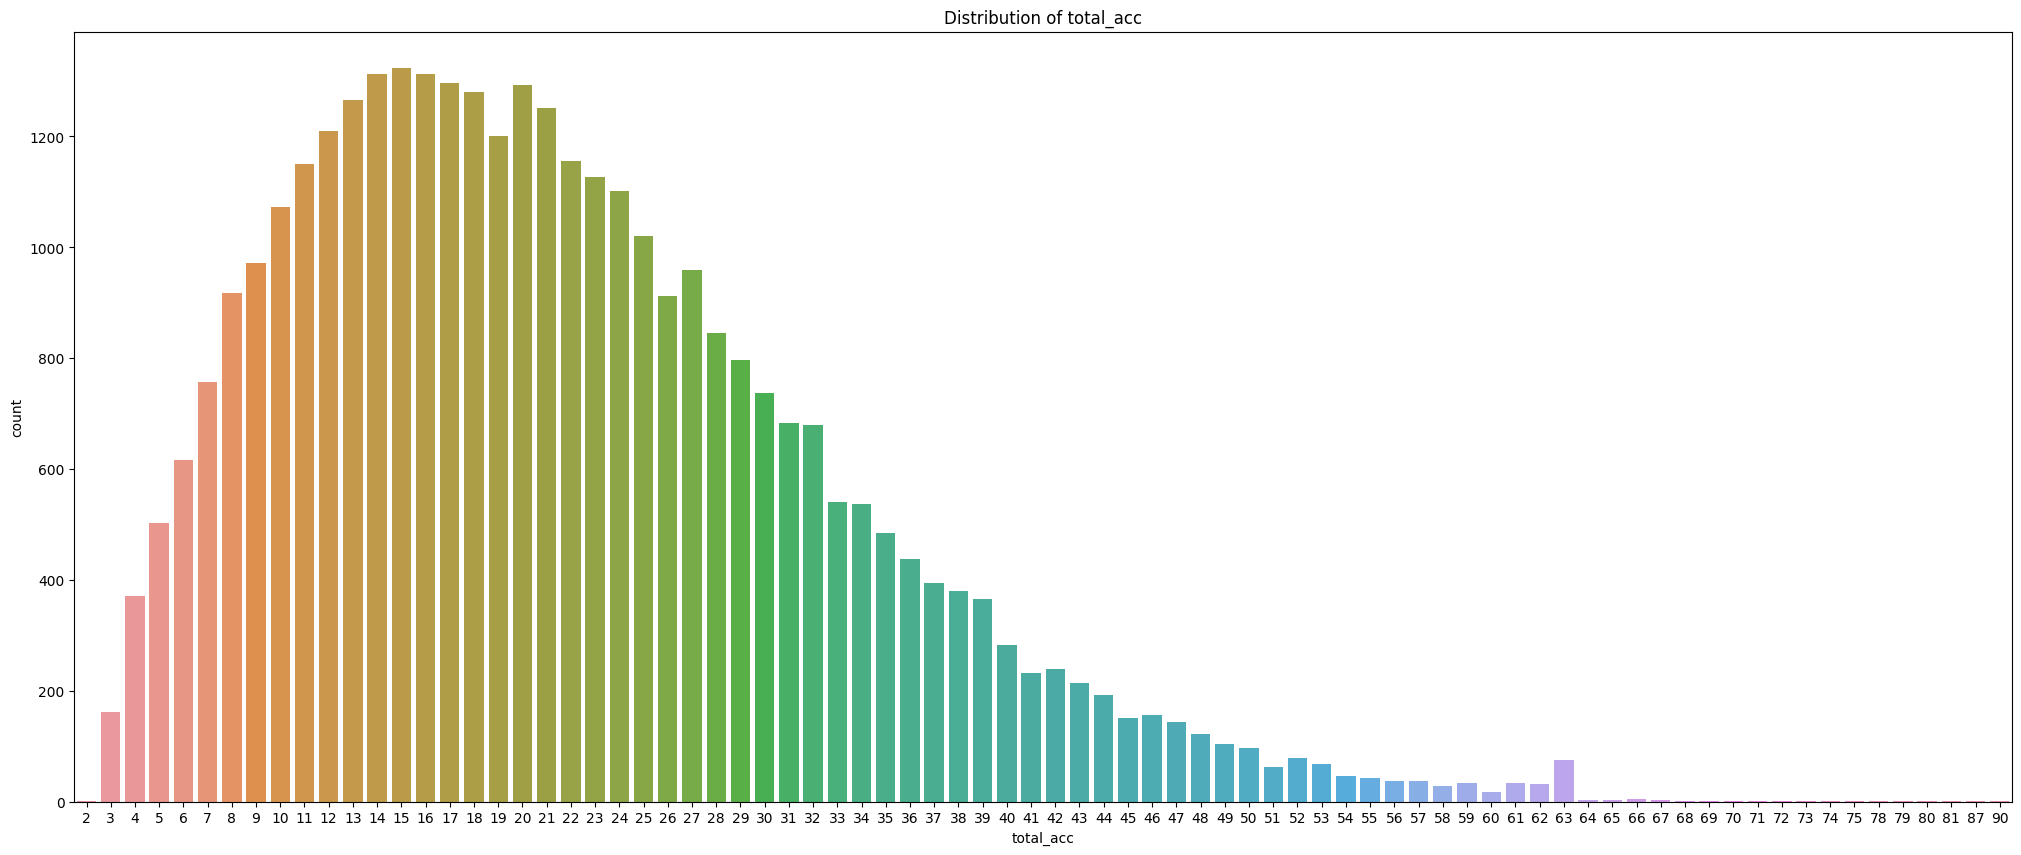

In [187]:
# Distribution of total_acc
plt.figure(figsize=(25,10))
sns.countplot(loanDataframe[loanDataframe['loan_status']=='Charged Off'],x=loanDataframe.total_acc)
plt.xlabel('total_acc')
plt.title('Distribution of total_acc')
plt.show()

##### If the total_acc is  between 8-27 then the loan is likely to default

### Observations from univariate analysis

##### The above analysis is with respect to 'charged-off' loans for each variable.Below are the observations

1.Charged Off (Defaulted) loans are less compared to Fully Paid loans.

2.Applicants with 36 months loan term are more likely to default compared to 60 months loan term

3.Applicants are most likely to default when the intrest rate is 14% to 18%

4.When the installment is between 152 to 282 then the applicants are most likely to default.

5.The applicants are most likely to default when the grade is B

6.When the Employment length of applicants is 10 years then the applicants are most likely to default.

7.Applicants are most likely to default when the home ownership is rented.

8.If the income is not verified by Lending Club then the loan is most likely to default.

9.Large number loans defaulted in 2011.

10.When the loan purpose is debt_consolidation then the applicants are most likely to default.

11.For the defaulted loans delinq_2yrs is mostly 0.

12.If the open_acc of applicant is between 5-10 then it is most likely to default.

13.When dti is between 12-15 the loan is most likely to default, but this not much significant.

14.If the total_acc is between 8-27 then the loan is likely to default.

15.If inq_last_6mths is 0 then the loan is most likely to default.

16.Applicants with annual income of 66k to 89k are most likely to default.

17.If earliest_cr_line_year is between 1994 to 2004 then the applicants are most likely to default


### Bivariate Analysis

Till now we have analysed each variables and its impact on 'loan_status',
now let us analyse a group of variables with respect to 'loan_status'

Analysing 'loan_amnt' with other variables 

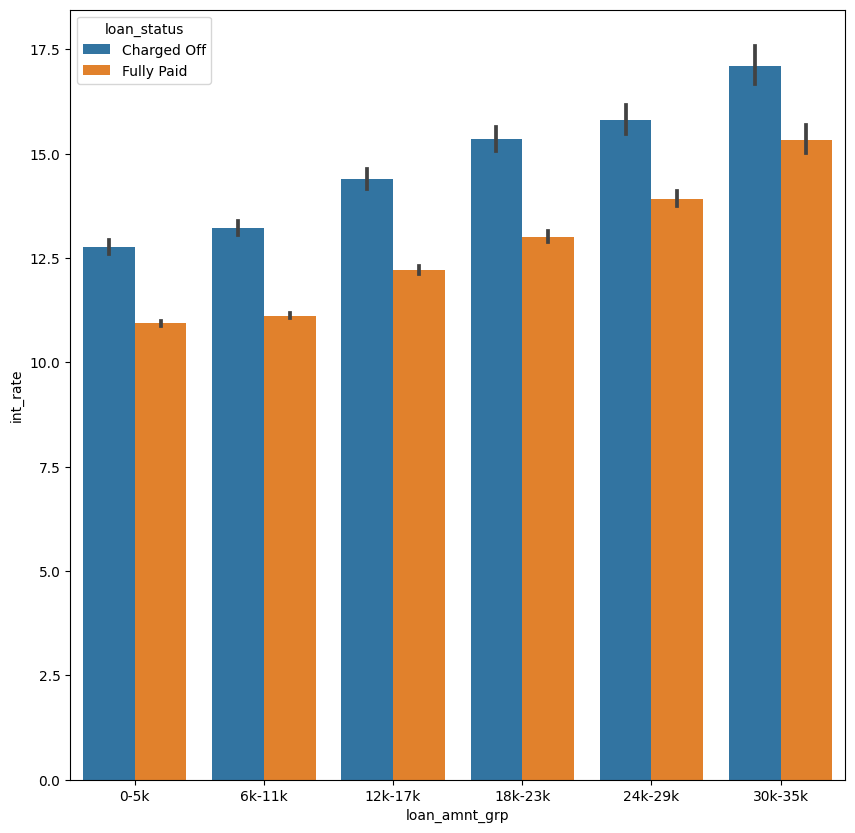

In [188]:
# loan_amnt vs 'int_rate' with respect to 'loan_status'
plt.figure(figsize=(10,10))
sns.barplot(data= loanDataframe, x = 'loan_amnt_grp', y = 'int_rate',hue='loan_status')
plt.show()

The charged off loans have higher interest rate across all loan amount groups.
So if the interest rate is high there are more chances of loan getting default

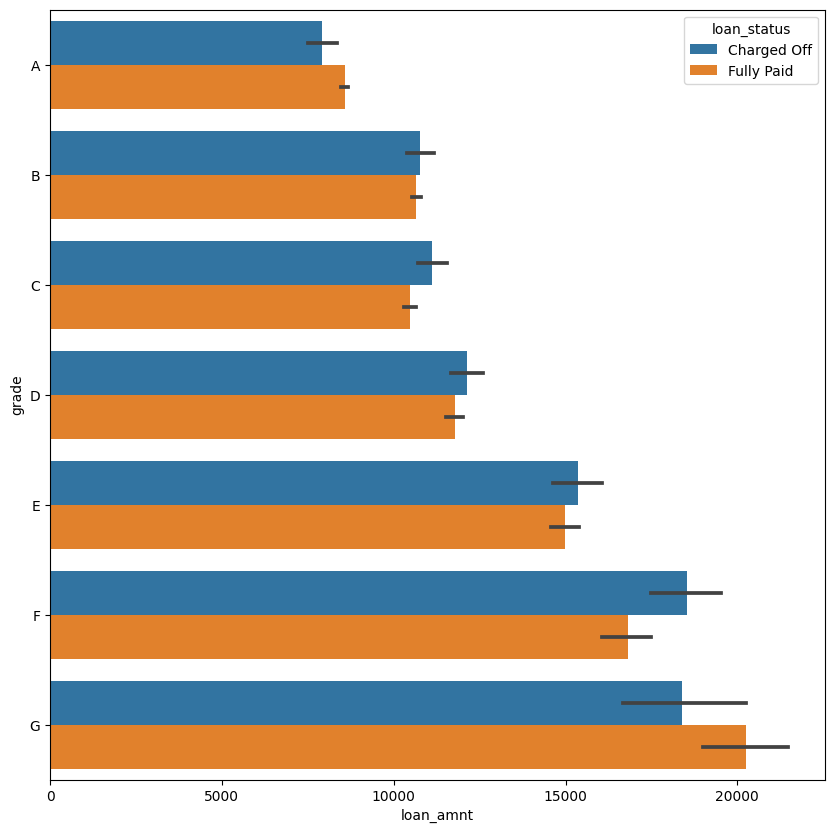

In [189]:
# 'loan_amnt' vs 'grade'
plt.figure(figsize=(10,10))
sns.barplot(data = loanDataframe, x = 'loan_amnt', y = 'grade', hue = 'loan_status')
plt.show()

The Loan defaulting is increasing from A to G grade

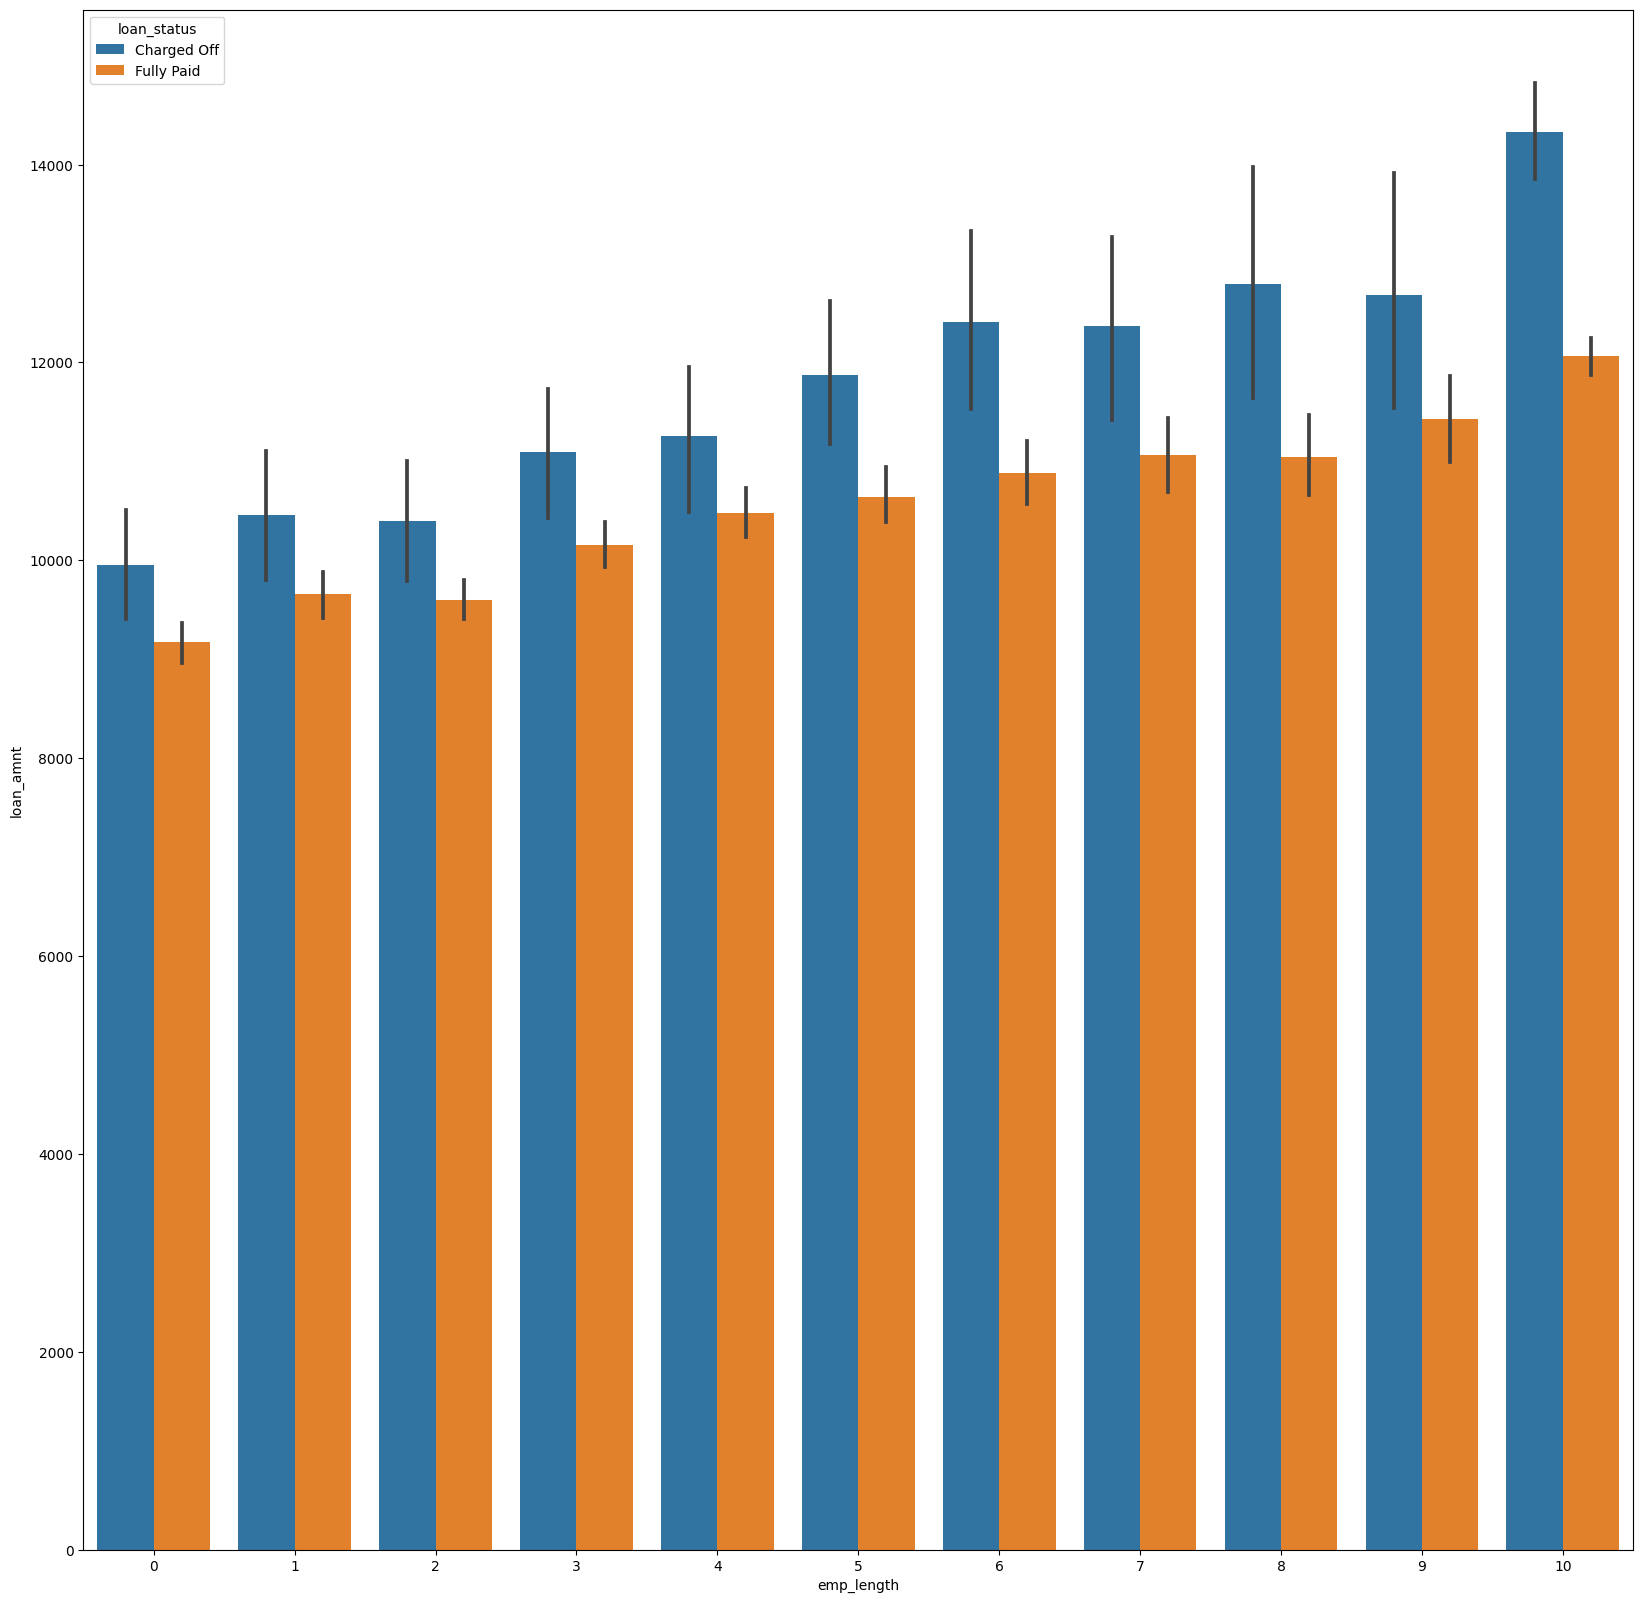

In [190]:
# 'loan_amnt' vs 'emp_length'
plt.figure(figsize = (20,20))
sns.barplot(data = loanDataframe, y = 'loan_amnt', x = 'emp_length', hue = 'loan_status')
plt.show()

Employees having longer employment length got the high loan amount and also loan was most likely to default
So as the loan amount and employment length is increasing the risk of defaulting is also increasing

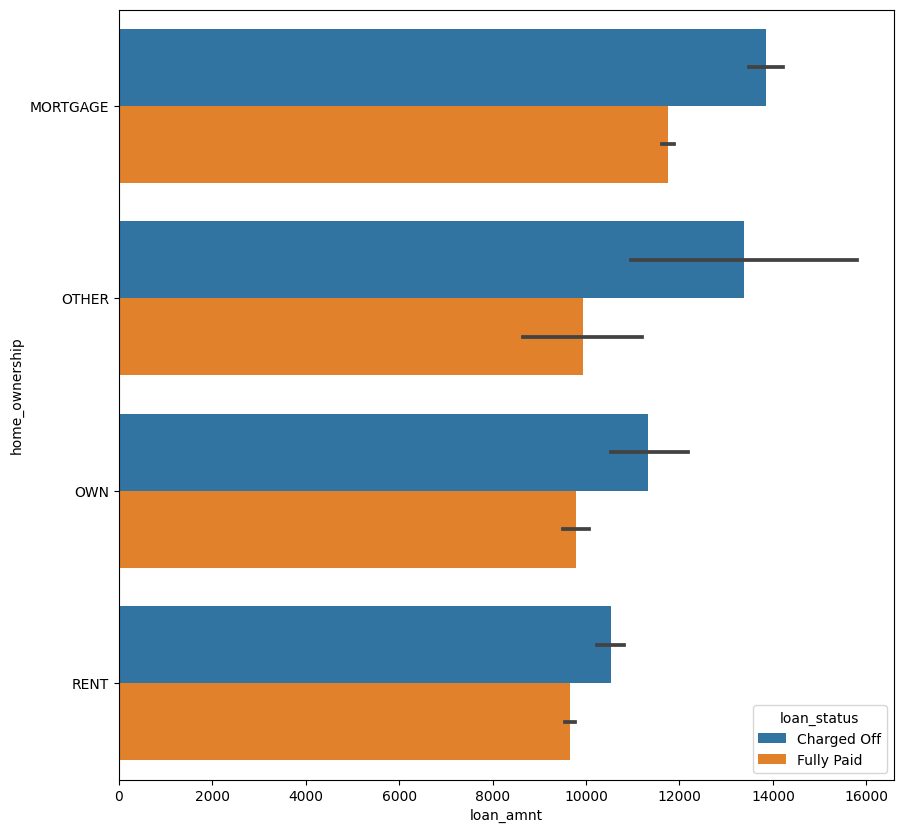

In [191]:
#'loan_amnt' vs 'home_ownership'
plt.figure(figsize = (10,10))
sns.barplot(data = loanDataframe, x = 'loan_amnt', y = 'home_ownership', hue = 'loan_status')
plt.show()

Applicants whose loan amount is high are likely to default.

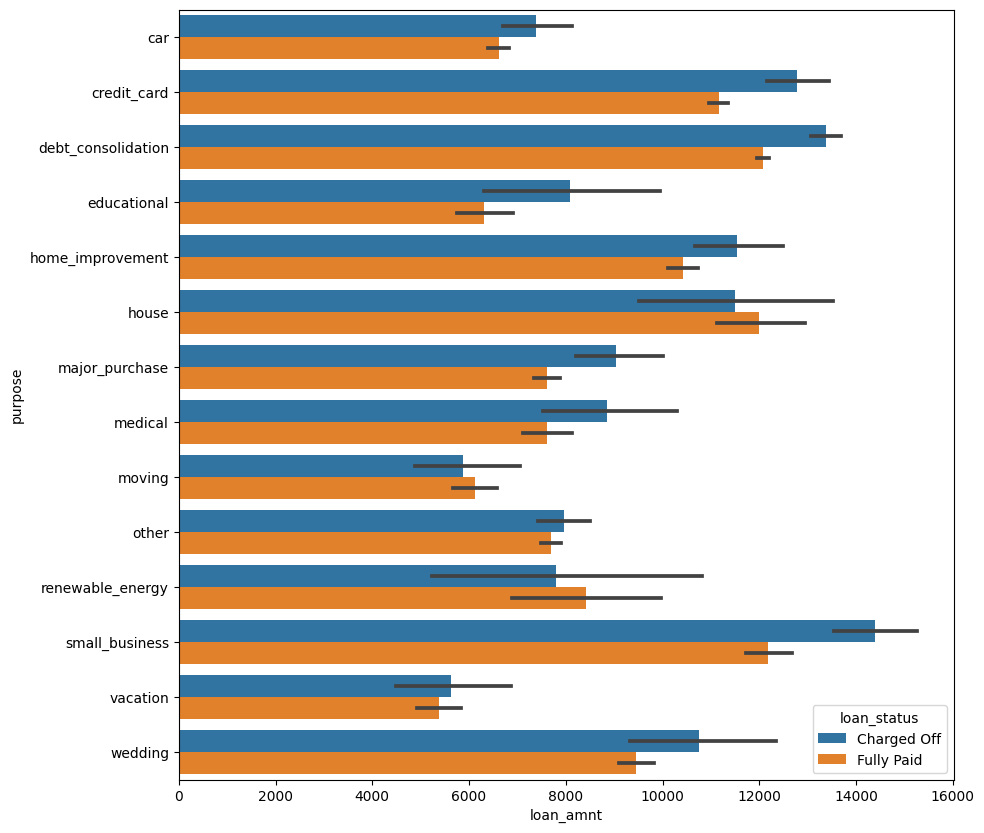

In [192]:
# loan_amnt vs loan_purpose
plt.figure(figsize=(10,10))
sns.barplot(data = loanDataframe, x = 'loan_amnt', y = 'purpose', hue = 'loan_status')
plt.show()

Applicants taken loan for small business and the loan amount is between 12k to 14.5k, then the applicants are more likely to default.

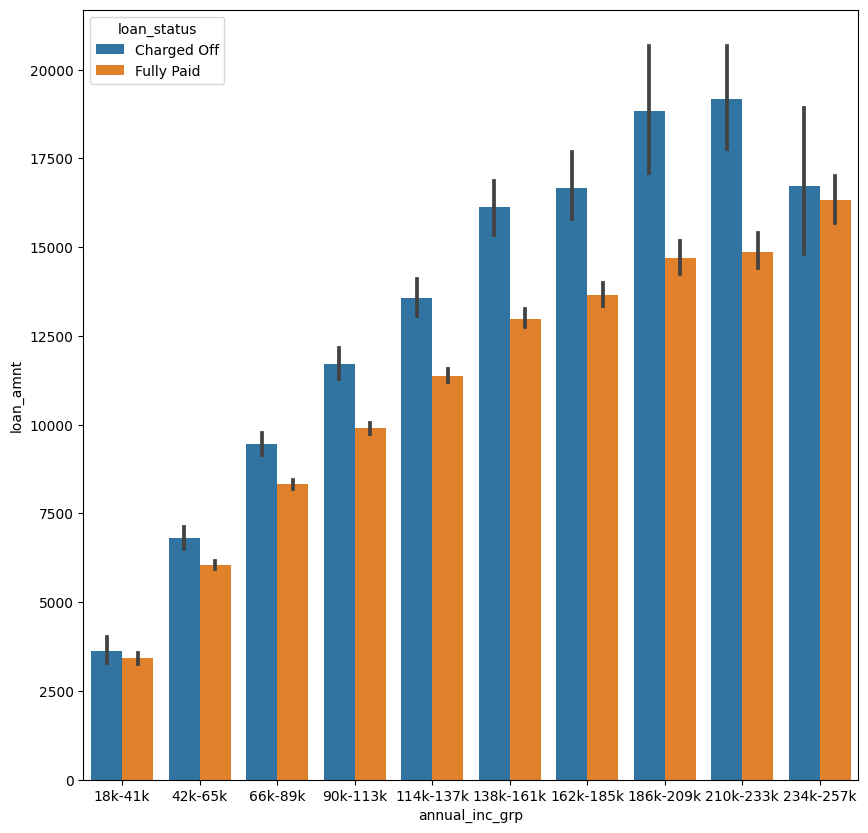

In [193]:
# loan amount vs annual income
plt.figure(figsize = (10,10))
sns.barplot(data = loanDataframe, y = 'loan_amnt', x = 'annual_inc_grp', hue = 'loan_status')
plt.show()

We can observe that loan amount is higher for applicants who defaulted and with annual income between 186k to 233k

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

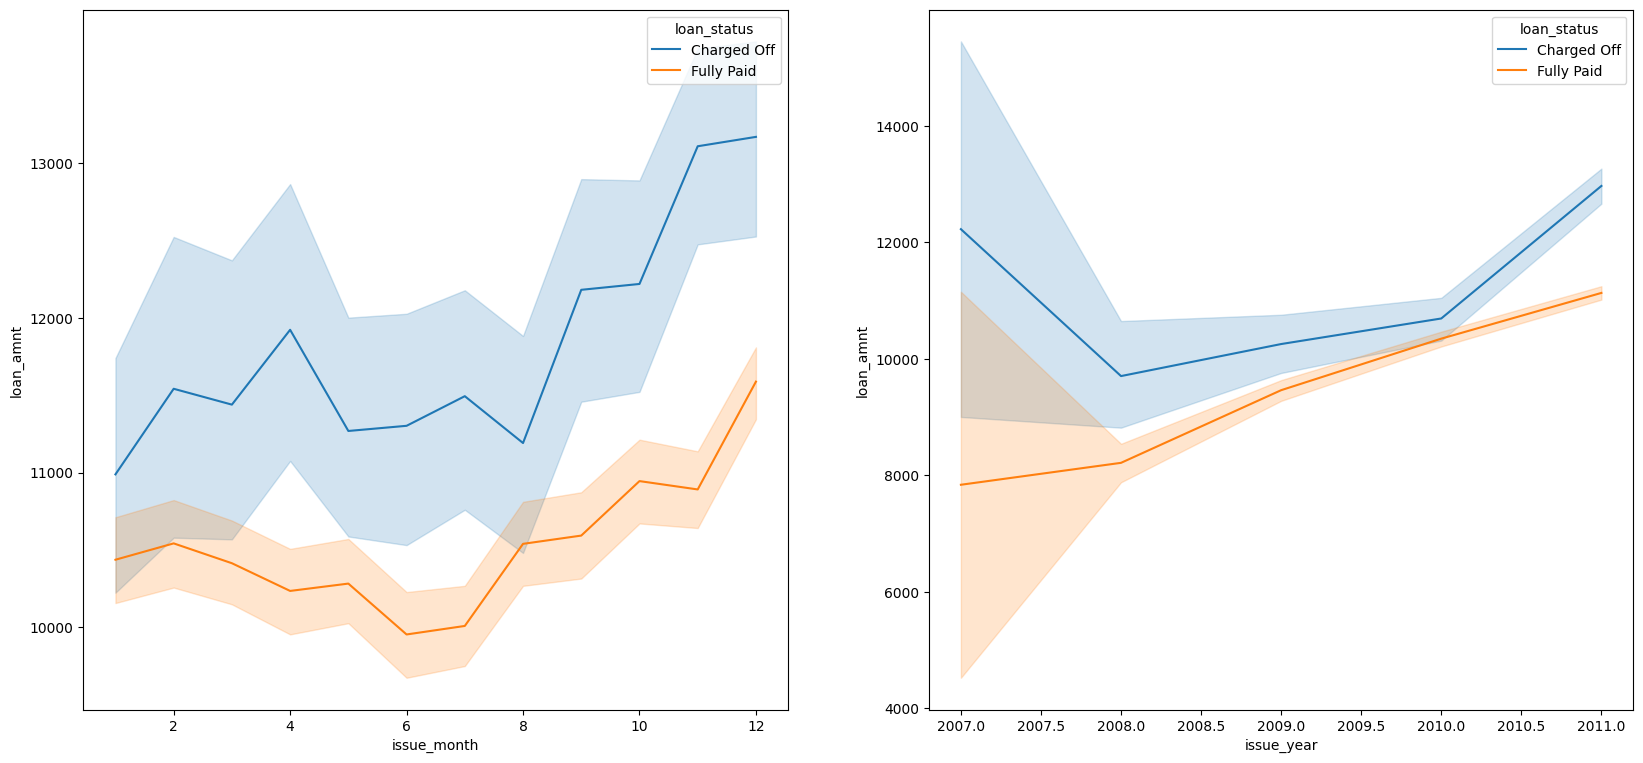

In [194]:
# loan amounts vs issue month and issue year
plt.figure(figsize = (20,20))
plt.subplot(221)
sns.lineplot(data = loanDataframe, y = 'loan_amnt', x = 'issue_month', hue = 'loan_status')
plt.subplot(222)
sns.lineplot(data = loanDataframe, y = 'loan_amnt', x = 'issue_year' , hue = 'loan_status')

Applicants most likely to default in the months between oct to dec mostly december, applicants defaulted mostly in the year 2011

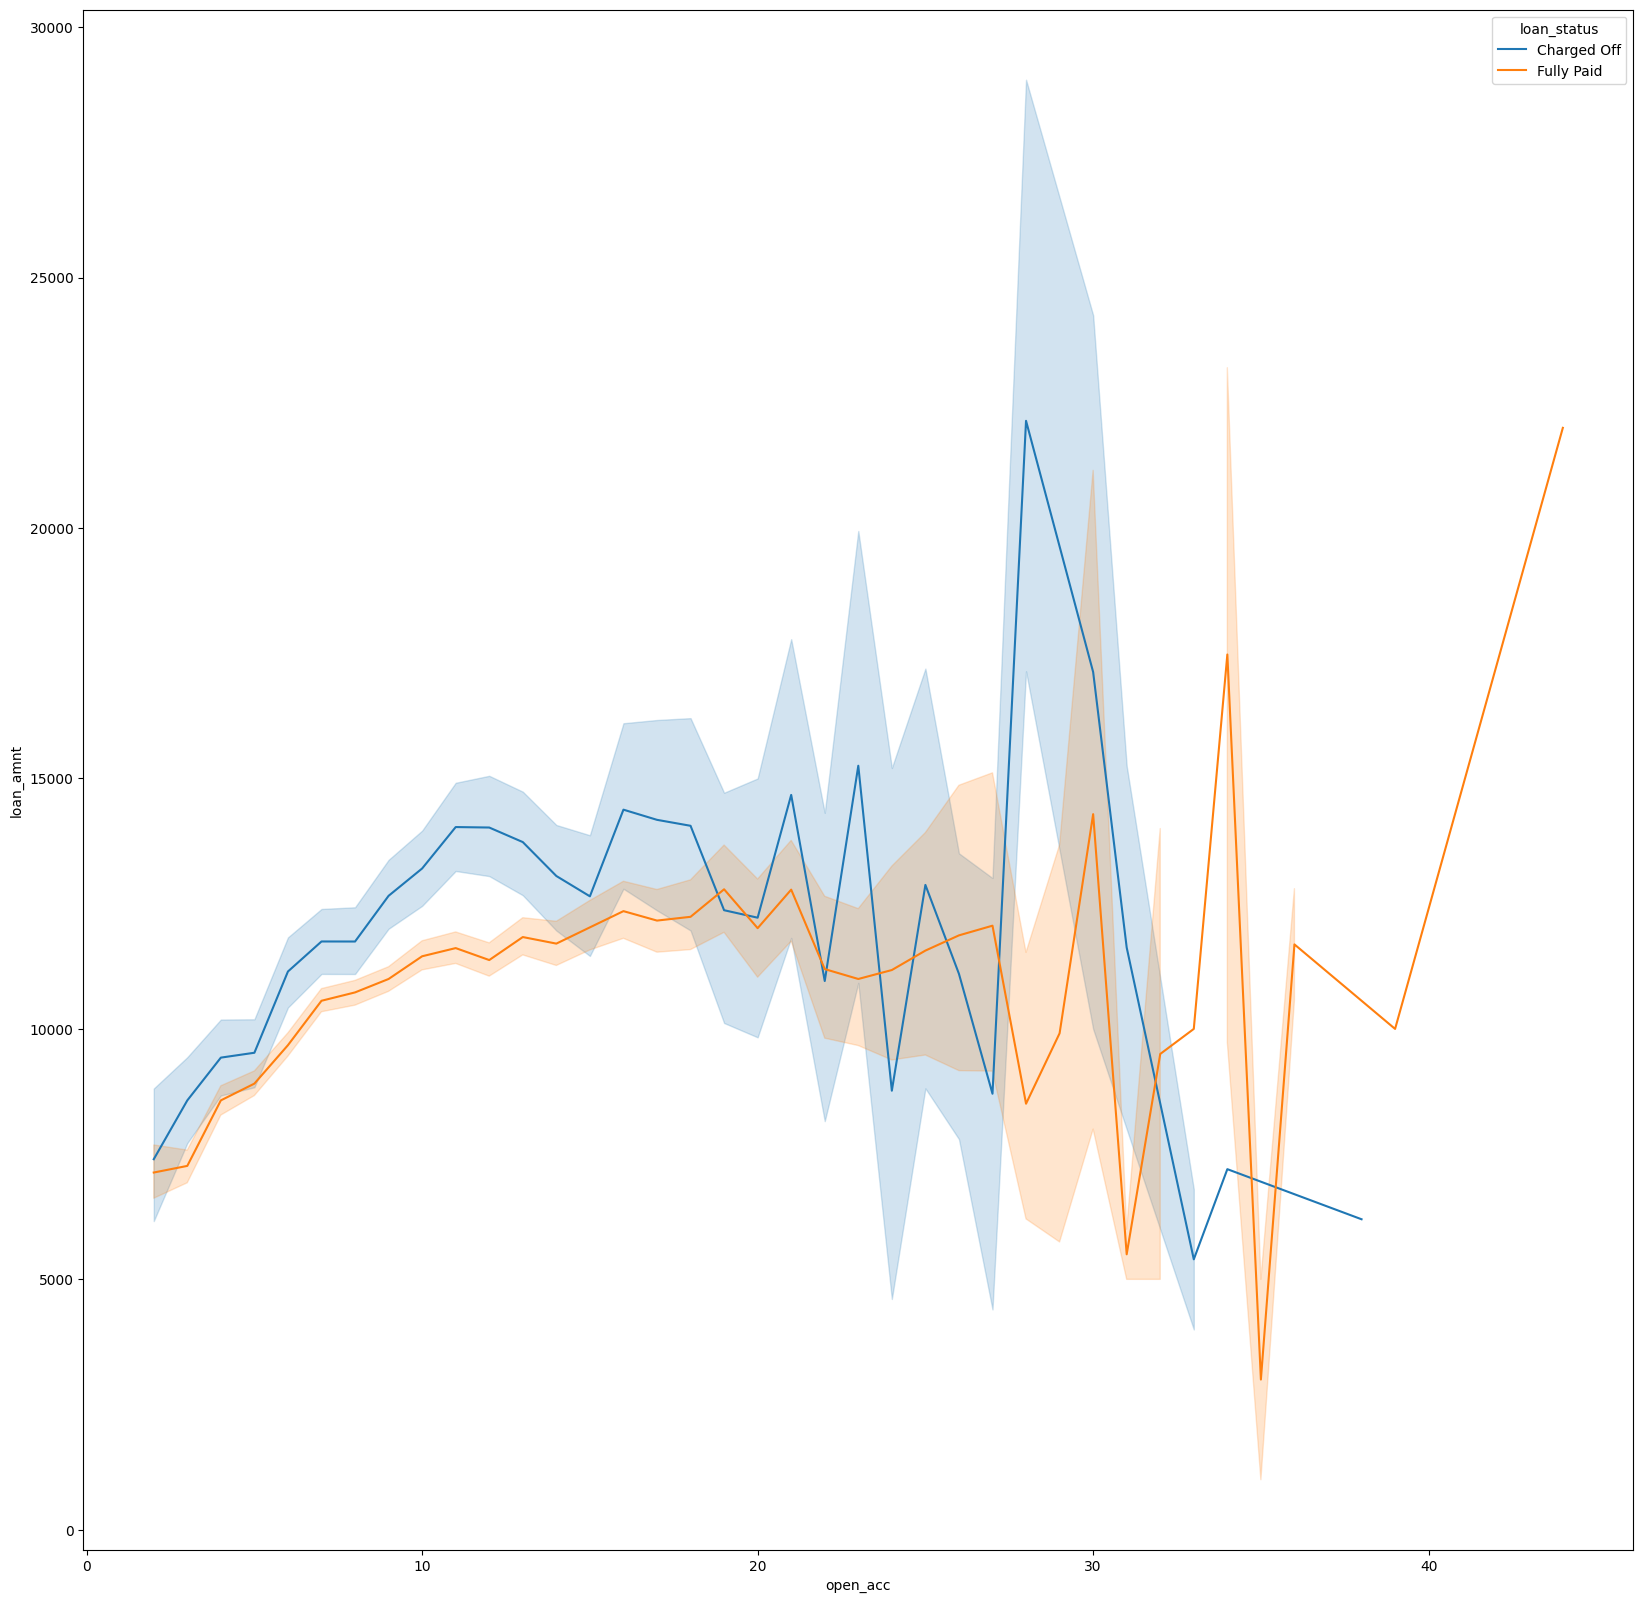

In [195]:
# loan amount vs open acc
plt.figure(figsize=(20,20))
sns.lineplot(data = loanDataframe, y = 'loan_amnt', x = 'open_acc', hue = 'loan_status' )
plt.show()

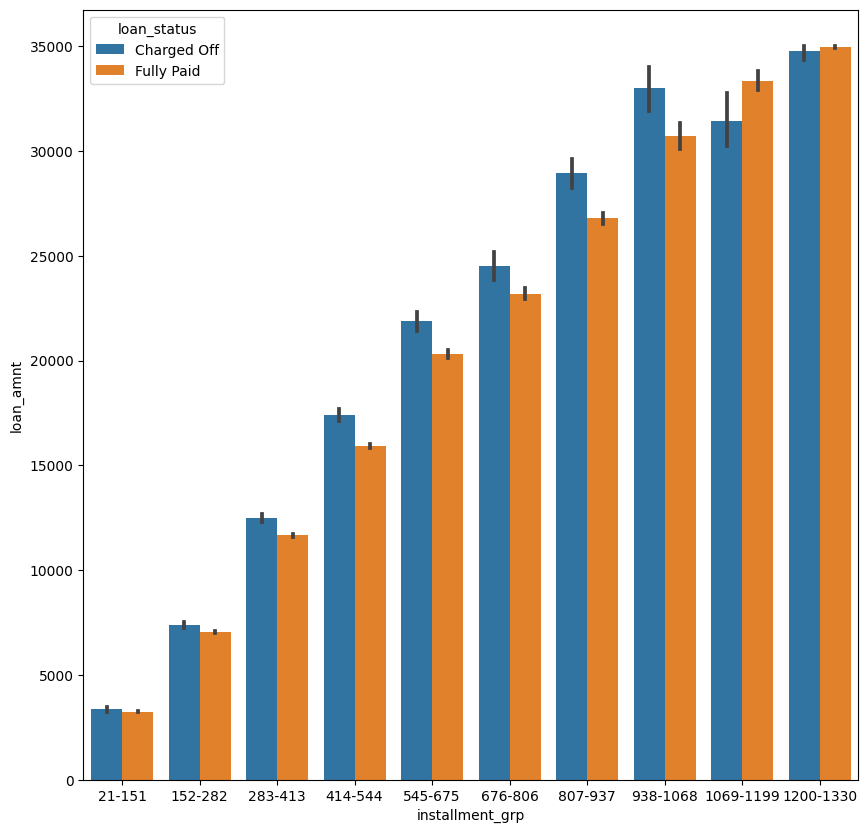

In [196]:
#loan amount vs installments
plt.figure(figsize = (10,10))
sns.barplot(data = loanDataframe, x = 'installment_grp', y = 'loan_amnt', hue = 'loan_status')
plt.show()

As the installment is increasing the chances of loan defaulting is also increasing.

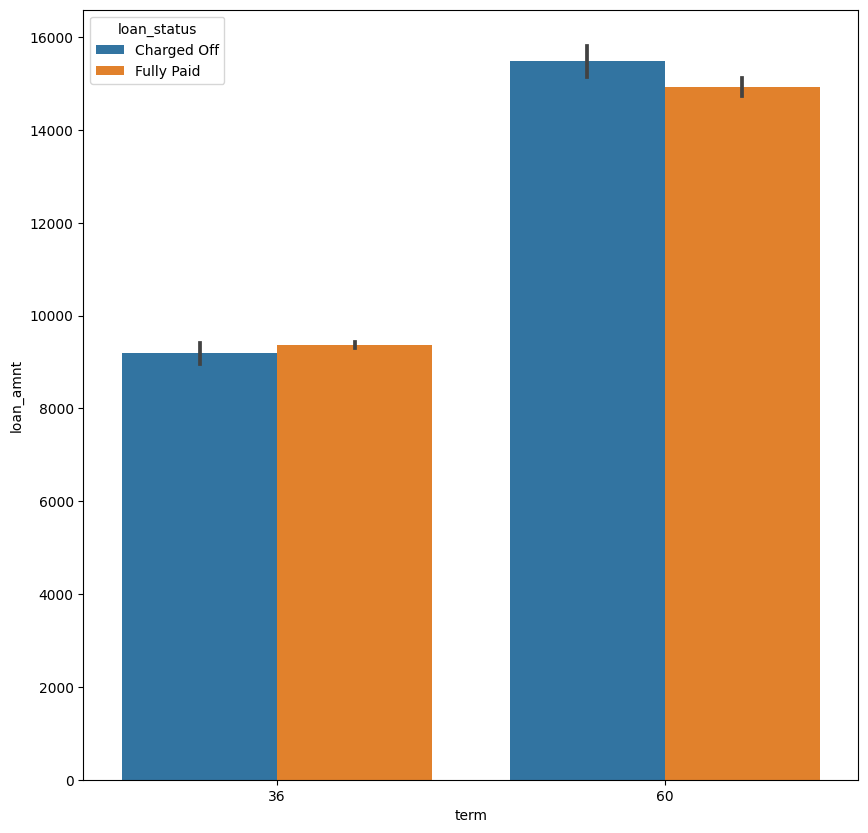

In [197]:
#loan amount vs term
plt.figure(figsize=(10,10))
sns.barplot(data = loanDataframe, y = 'loan_amnt', x = 'term', hue = 'loan_status' )
plt.show()

Applicants with 60 months loan term are likely to default compared to 36 months term

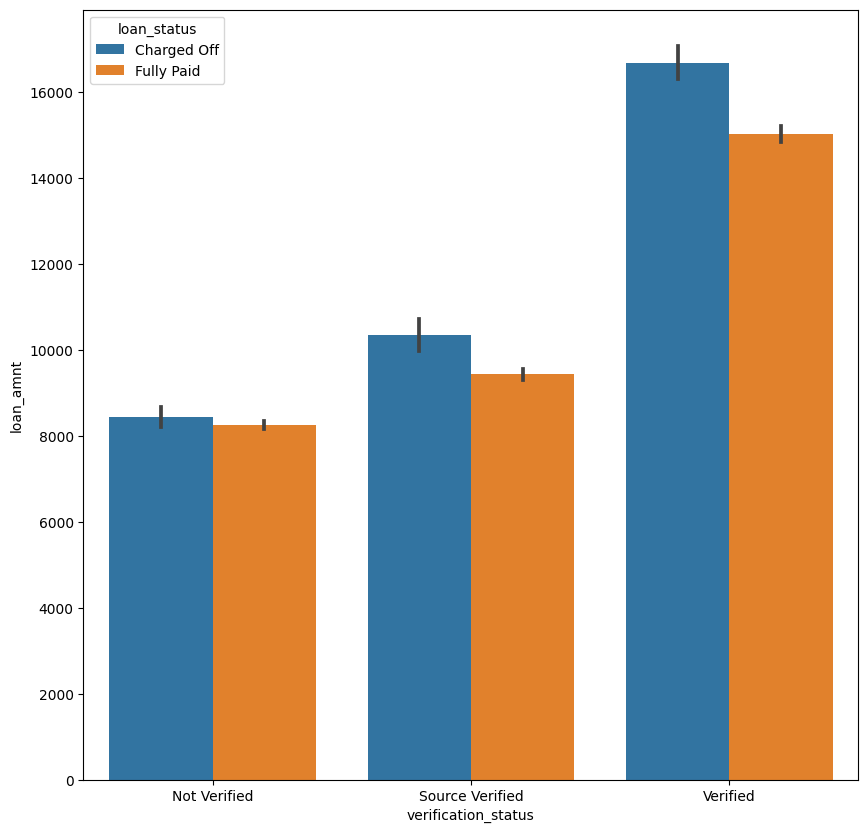

In [198]:
# loan amount vs verification status
plt.figure(figsize=(10,10))
sns.barplot(data = loanDataframe, y = 'loan_amnt', x = 'verification_status', hue = 'loan_status')
plt.show()

When applicants are verified and loan amount is greater than 15k then loan is likely to default

#### Analysing annual income with other variables with respect to loan status

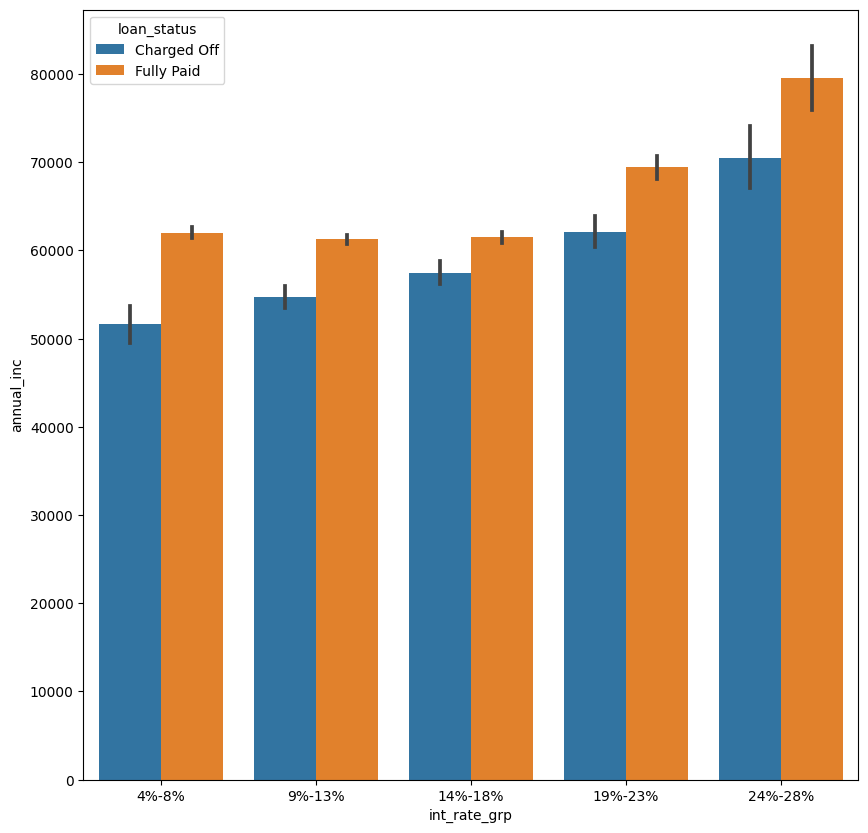

In [199]:
# annual income vs interest rate
plt.figure(figsize = (10,10))
sns.barplot(data = loanDataframe, y = 'annual_inc', x = 'int_rate_grp', hue = 'loan_status')
plt.show()

If the annual income is high across all interest rate groups, then there is less chances of loan getting default

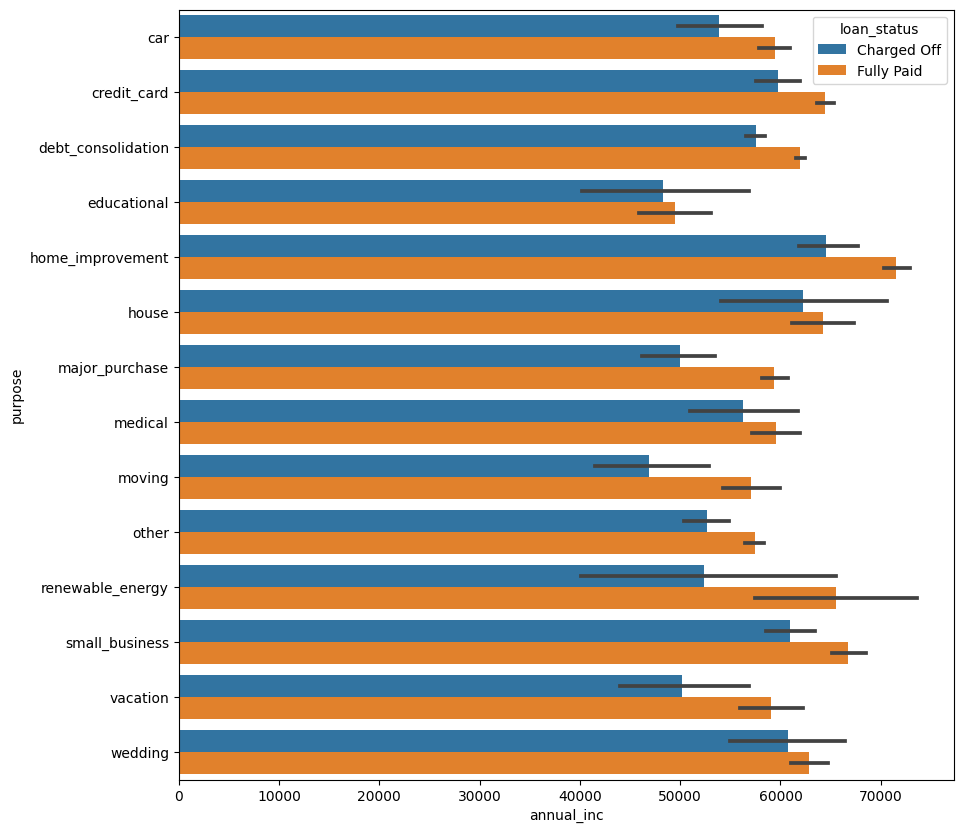

In [200]:
# annaul income vs loan purpose
plt.figure(figsize = (10,10))
sns.barplot(data = loanDataframe, x = 'annual_inc', y = 'purpose', hue = 'loan_status')
plt.show()

Applicants with highest salary applied loans for home improvement and also they are once likely to default.

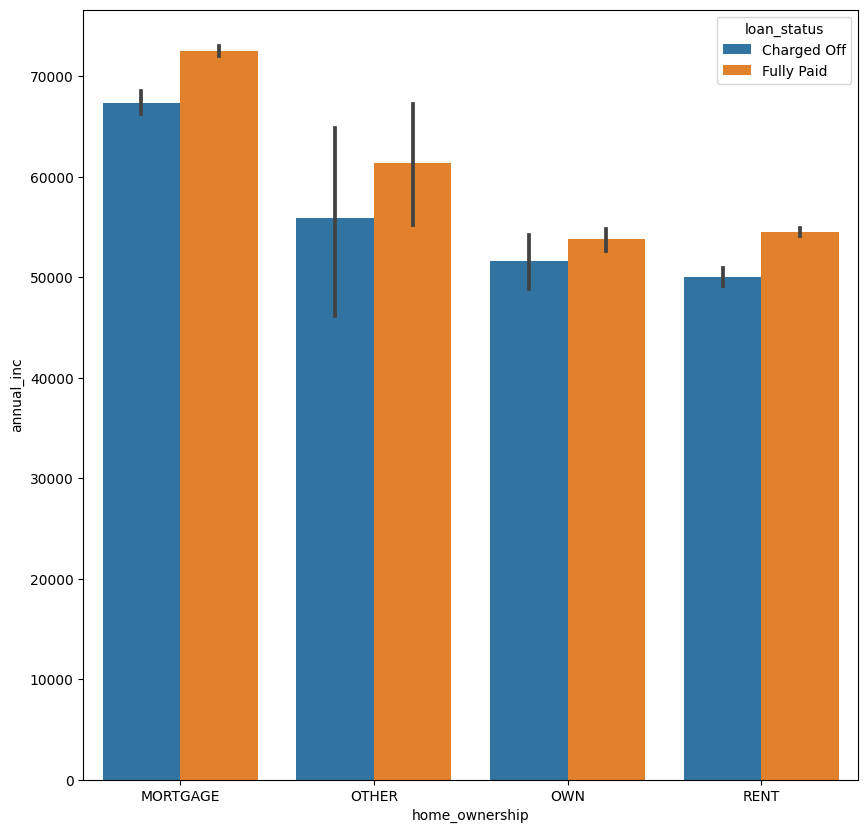

In [201]:
# annual income vs home ownership
plt.figure(figsize = (10,10))
sns.barplot(data = loanDataframe, y = 'annual_inc', x = 'home_ownership', hue = 'loan_status')
plt.show()

If the applicants have high annual income then they are not likely to default.

### Observations from Bivariate analysis

#### The above analysis is with respect to loan status for two variables. Below are the observations

1.The charged off loans have higher interest rate across all loan amount groups. So if the interest rate is high there are more chances of loan getting default.

2.The Loan defaulting is increasing from A to G grade.

3.As the loan amount and employment length is increasing the risk of defaulting is also increasing.

4.Applicants whose loan amount is high are likely to default.

5.Applicants taken loan for small business and the loan amount is between 12k to 14.5k, then the applicants are more likey to default.

6.We can observe that loan amount is higher for applicants who defaulted and with annual income between 186k to 233k.

7.Applicants most likely to default in the months between oct to dec mostly december, applicants defaulted mostly in the year 2011

8.As the installment is increasing the chances of loan defaulting is also increasing.

9.Applicants with 60 months loan term are likely to default compared to 36 months term.

10.When applicants are verified and loan amount is greater than 15k then loan is likely to default.

11.If the annual income is high across all interest rate groups then there less chances of loan getting default.

12.Applicants with highest salary applied loans for home improvement and also they are once likely to default.

13.If the applicants have high annual income then they are not likely to default.

##### Multivariate analysis

<Axes: >

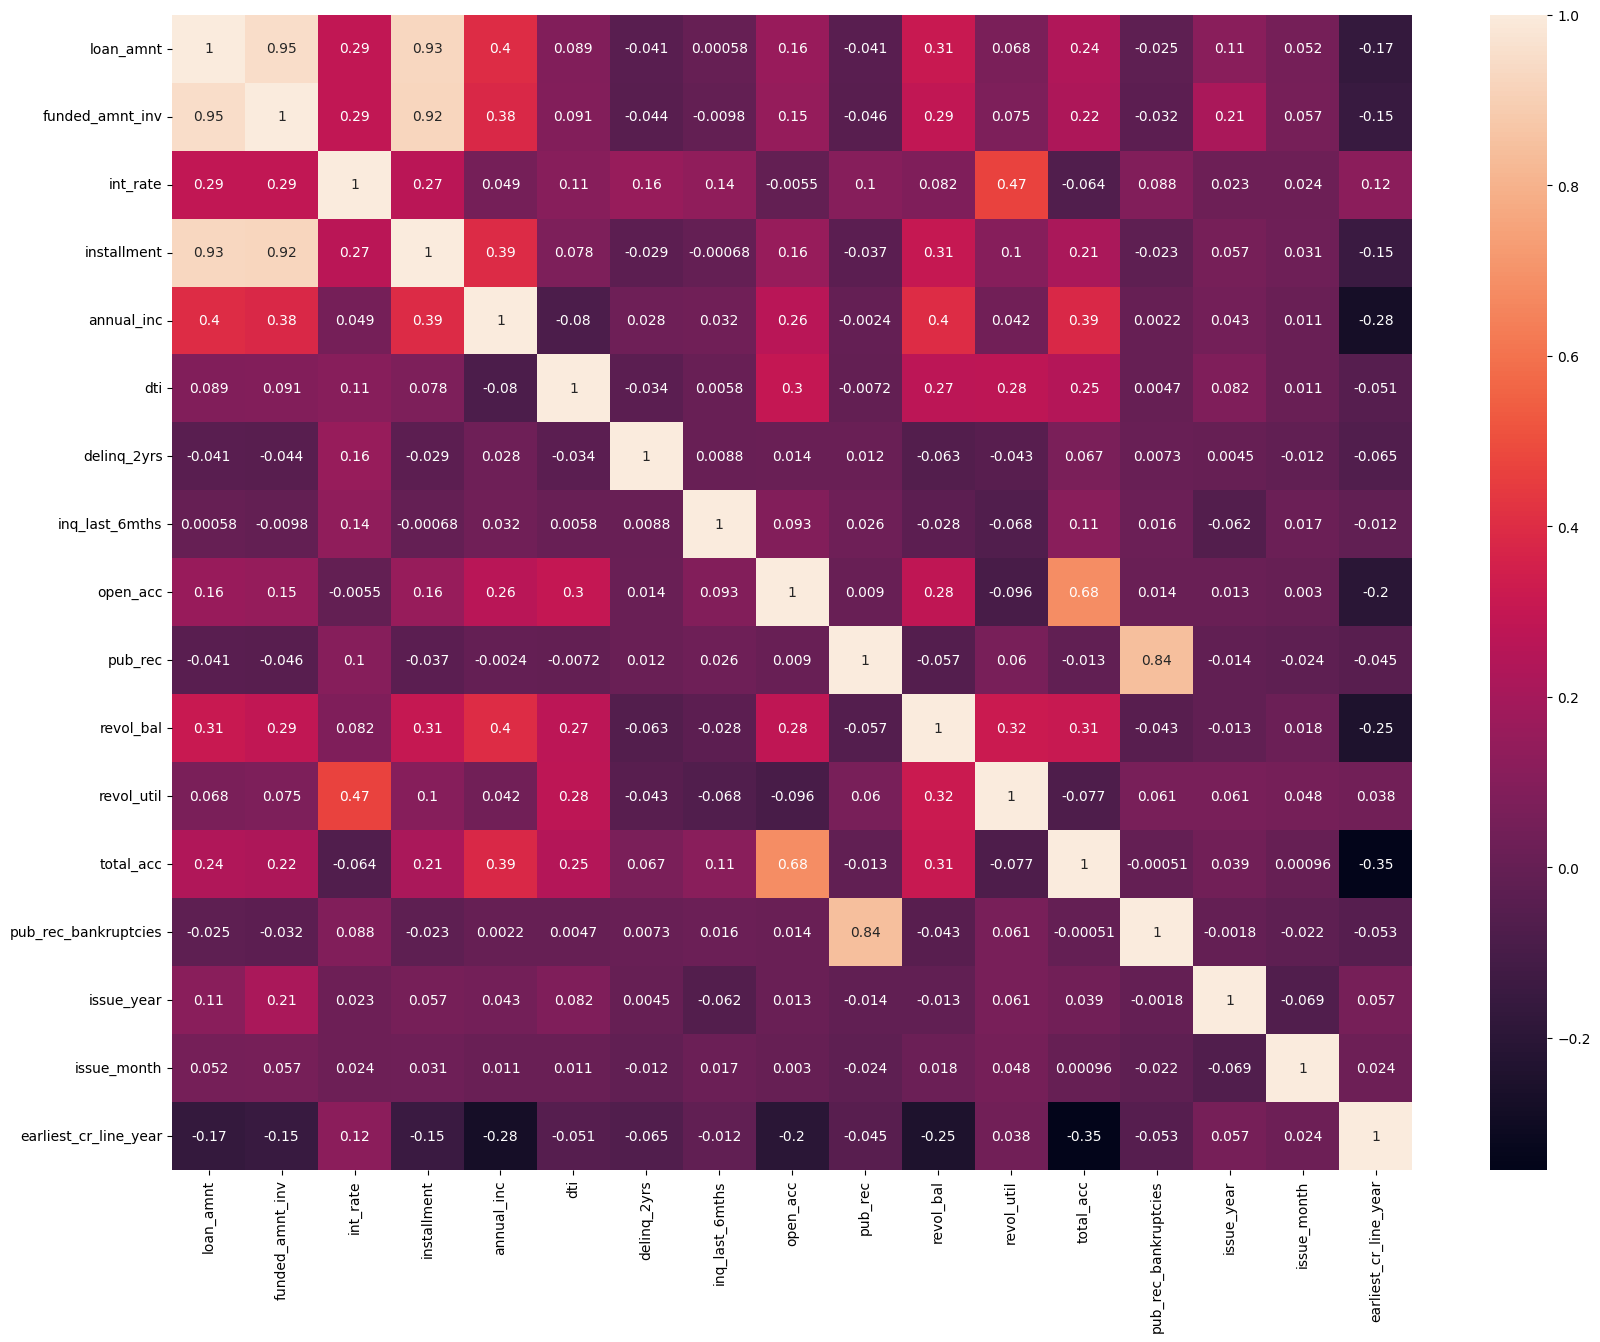

In [126]:
# Plotting heatmap against continuos data
correlationDataframe = pd.DataFrame().assign(loan_amnt=loanDataframe['loan_amnt'], funded_amnt_inv=loanDataframe['funded_amnt_inv'], int_rate=loanDataframe['int_rate'], installment=loanDataframe['installment'],
                                       annual_inc=loanDataframe['annual_inc'], dti=loanDataframe['dti'], delinq_2yrs =loanDataframe['delinq_2yrs'], inq_last_6mths =loanDataframe['inq_last_6mths'],
                                       open_acc =loanDataframe['open_acc'], pub_rec =loanDataframe['pub_rec'], revol_bal =loanDataframe['revol_bal'], revol_util =loanDataframe['revol_util'],
                                       total_acc =loanDataframe['total_acc'], pub_rec_bankruptcies =loanDataframe['pub_rec_bankruptcies'], issue_year =loanDataframe['issue_year'], issue_month =loanDataframe['issue_month'],
                                       earliest_cr_line_year =loanDataframe['earliest_cr_line_year'])

correlationDataframe.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlationDataframe.corr(),annot=True)

##### Observations
- loan_amnt, funded_amnt_inv and installment are higly correlated.


##### Driving Factors
1. Interest rate
2. Loan Amount
3. Installment
4. Grade
5. Term
6. Annual Income
7. Purpose
8. Sub Grade
9. Home Ownership